In [126]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
mpl.style.use('plotting.mplstyle')
mpl.rcParams.update({"text.latex.preamble": r"\usepackage{bm}"})
import matplotlib.pyplot as plt
import pycbc.noise
import pycbc.psd
from astropy.cosmology import z_at_value,Planck15
import astropy.units as u
from pycbc.filter import highpass_fir, lowpass_fir,highpass,lowpass
from pycbc.waveform import td_approximants, fd_approximants
from pycbc import types, fft, waveform

blue='#1f78b4'
green='#33a02c'
red='#e31a1c'

# 0. Construct reference waveform to be used below

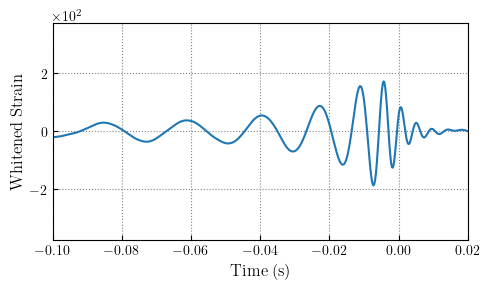

In [12]:
# Reference masses and distance
m1=40.
m2=40.
DL = 1000

# Assume 10 Hz cutoff and 4096Hz sampling rate
dt = 1/4096.
flow = 10

# Generate waveform
sptilde, sctilde = waveform.get_td_waveform(approximant="IMRPhenomPv2",
                                            mass1=m1,
                                            mass2=m2,
                                            delta_t=dt,
                                            f_lower=flow,
                                            distance=DL,
                                            coa_phase=0,
                                            spin1z=0.0,
                                            spin2z=0.0)

# Load PSD
flow = 10.0
delta_f = 1/sptilde.duration
flen = int((2048)/delta_f) + 1
psd_L1_O3 = pycbc.psd.from_txt("aligo_O3actual_H1.txt",flen, delta_f,flow,is_asd_file=True)

# Whiten strain data
sf = sptilde.to_frequencyseries()
sf_whitened = sf/(psd_L1_O3**0.5)
sf_whitened._data[sf_whitened._data!=sf_whitened._data] = 0
sf_whitened._data[np.abs(sf_whitened._data)==np.inf] = 0
white_strain_reference = sf_whitened.to_timeseries()

# Peak strain, for plotting purposes
peak_strain = np.max(np.abs(np.array(white_strain_reference)))

# Plot!
fig,ax = plt.subplots(figsize=(5,3))
ax.set_rasterization_zorder(1)
ax.plot(white_strain_reference.get_sample_times(),white_strain_reference)
ax.set_xlim(-0.1,0.02)
ax.set_ylim(-2*peak_strain,2*peak_strain)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Whitened Strain')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.tight_layout()
plt.show()

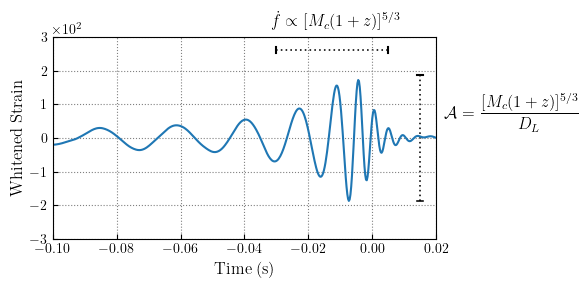

In [127]:
# Plot!
fig,ax = plt.subplots(figsize=(6,3))
ax.set_rasterization_zorder(1)

ax.plot(white_strain_reference.get_sample_times(),white_strain_reference)

ax.plot([0.015,0.015],[-peak_strain,peak_strain],color='black',lw=1.15,zorder=-1,dashes=(1,2))
ax.plot([0.014,0.016],[peak_strain,peak_strain],color='black',lw=1.5,zorder=-1)
ax.plot([0.014,0.016],[-peak_strain,-peak_strain],color='black',lw=1.15,zorder=-1)

ax.plot([-0.03,0.005],[1.4*peak_strain,1.4*peak_strain],color='black',lw=1.15,zorder=-1,dashes=(1,2))
ax.plot([-0.03,-0.03],[1.35*peak_strain,1.45*peak_strain],color='black',lw=1.5,zorder=-1)
ax.plot([0.005,0.005],[1.35*peak_strain,1.45*peak_strain],color='black',lw=1.5,zorder=-1)

ax.text(1.02,0.6,r'$\mathcal{A} = \displaystyle\frac{[M_c(1+z)]^{5/3}}{D_L}$',transform=ax.transAxes,fontsize=12)
ax.text(0.57,1.06,r'$\dot f \propto [M_c (1+z)]^{5/3}$',transform=ax.transAxes,fontsize=12)

ax.set_xlim(-0.1,0.02)
ax.set_ylim(-3e2,3e2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Whitened Strain')

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.tight_layout()
plt.savefig('reference_waveform.jpg'.format(frame),bbox_inches='tight',dpi=400)
plt.show()

# 1. Frames illustrating effect of varying redshifted mass

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


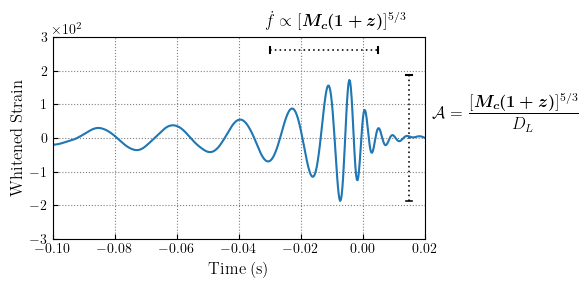

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


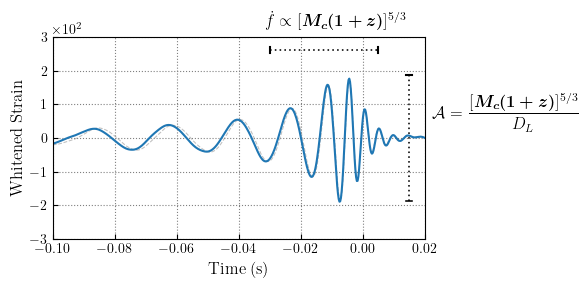

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


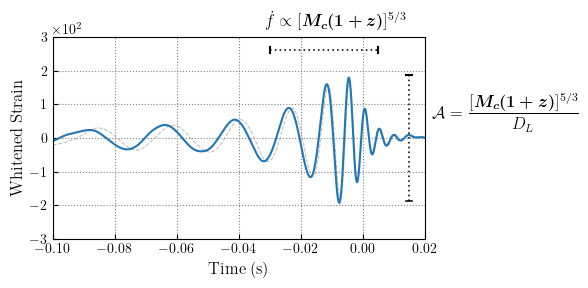

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


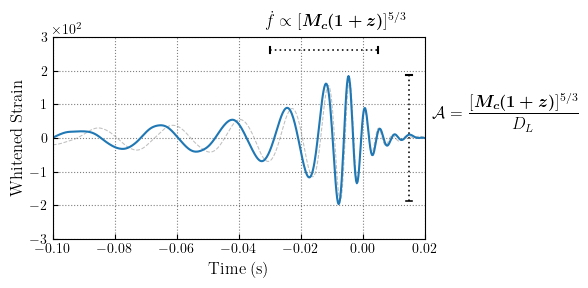

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


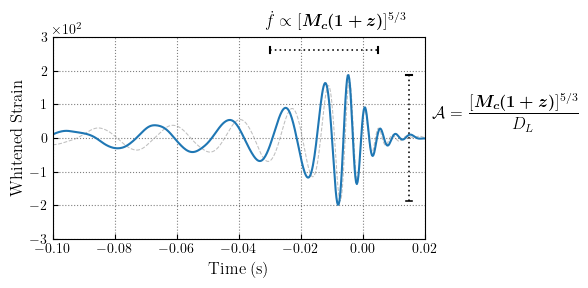

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


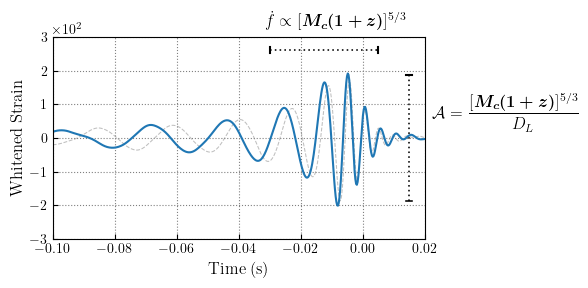

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


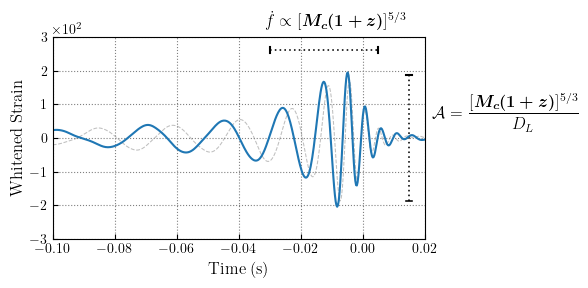

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


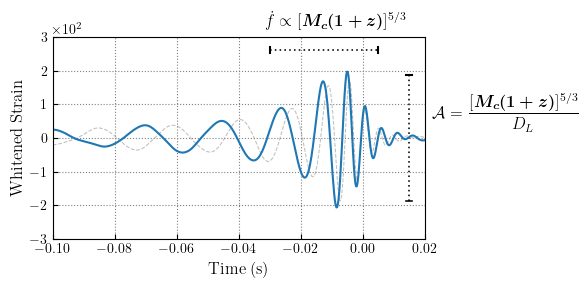

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


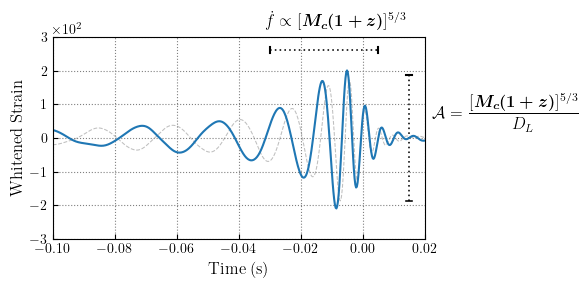

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


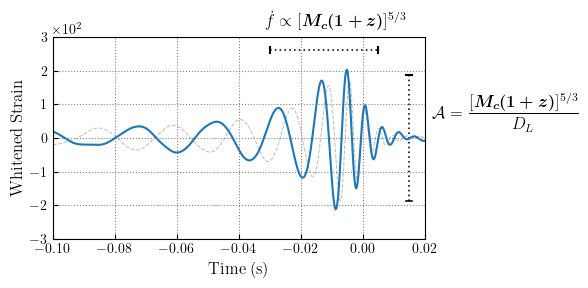

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


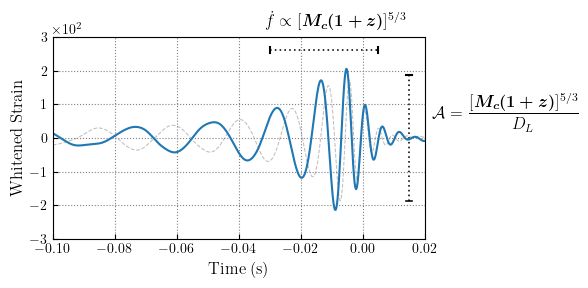

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


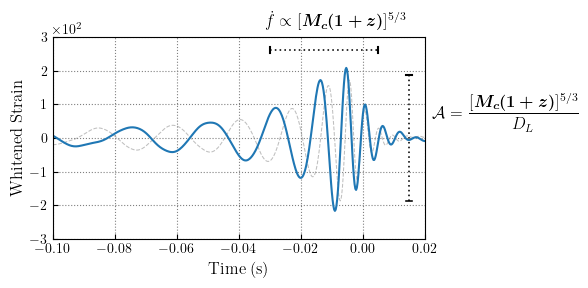

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


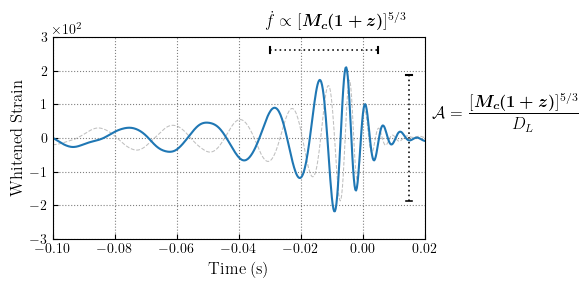

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


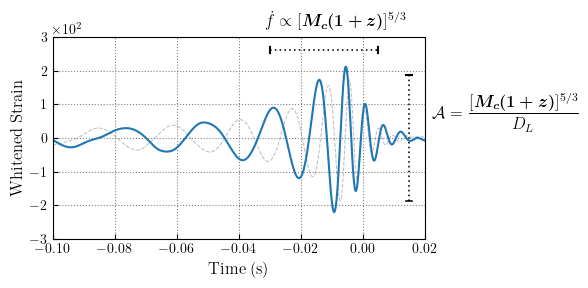

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


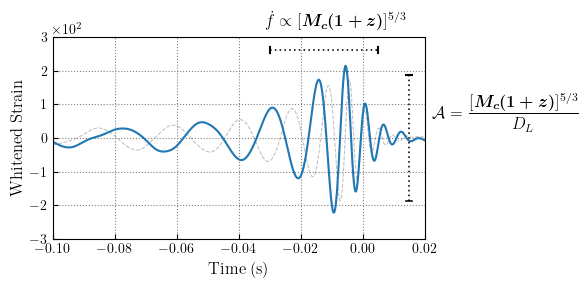

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


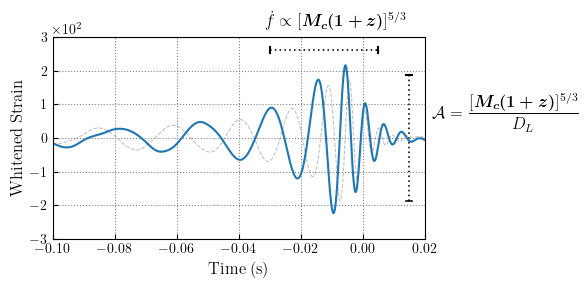

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


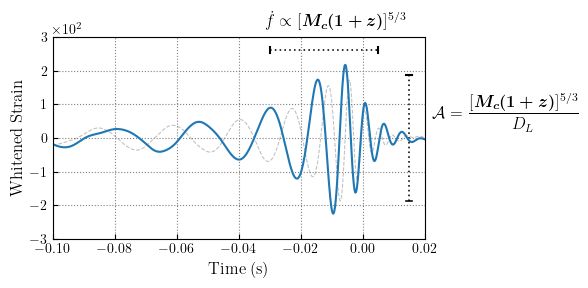

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


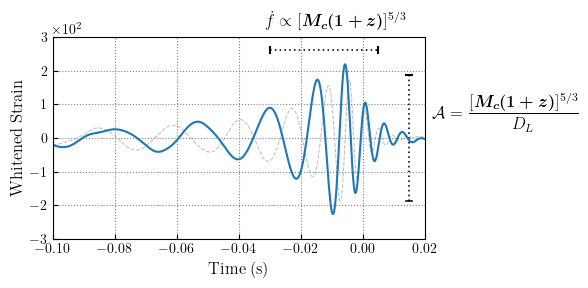

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


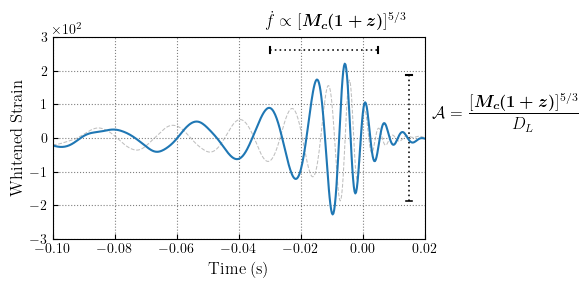

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


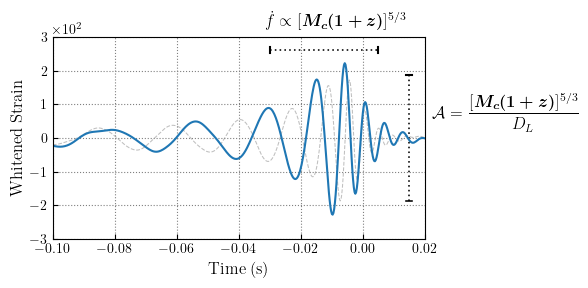

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


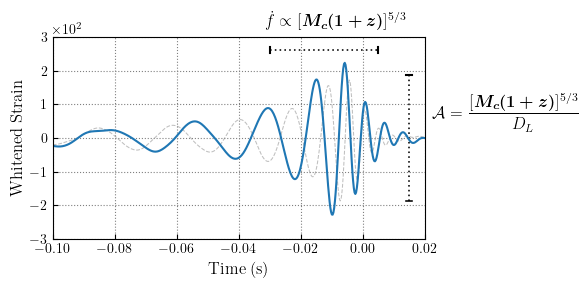

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


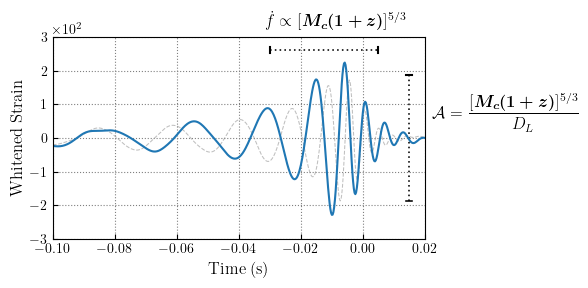

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


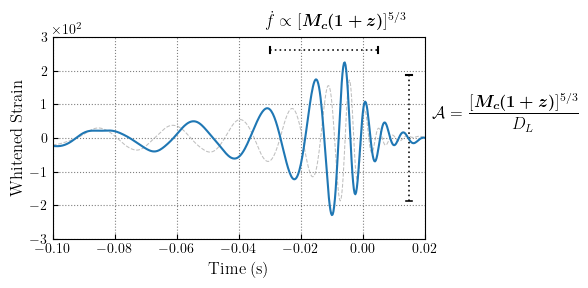

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


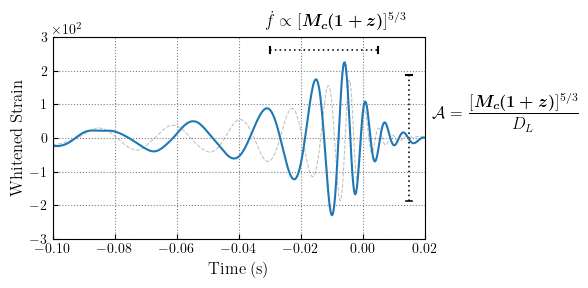

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


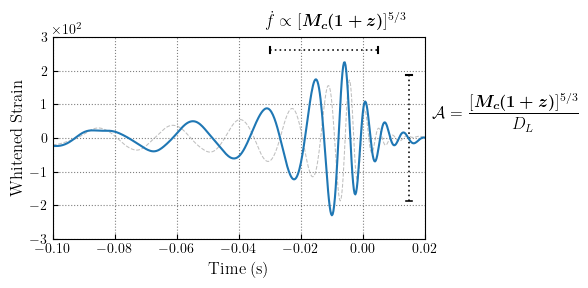

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


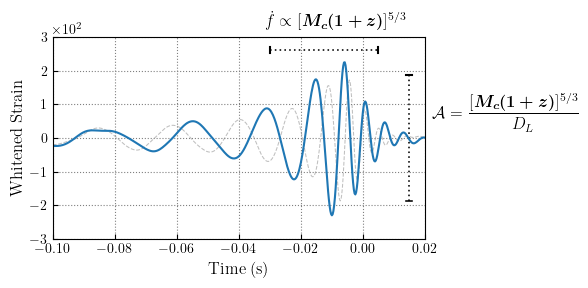

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


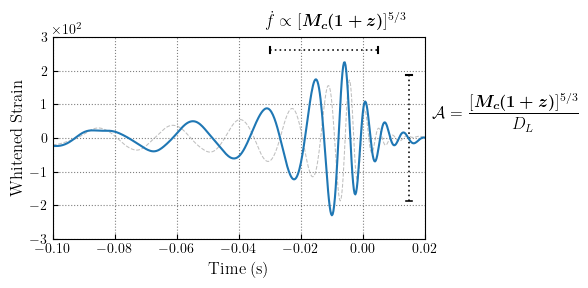

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


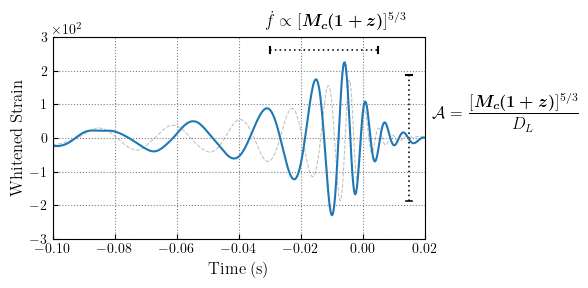

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


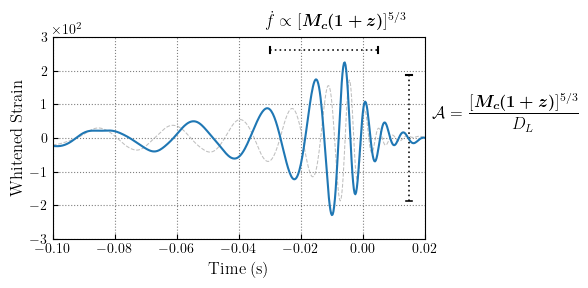

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


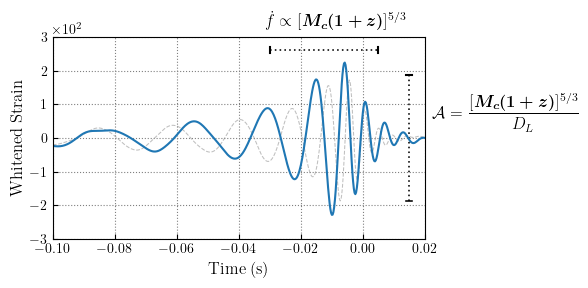

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


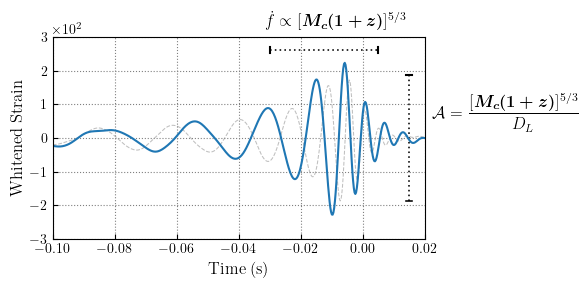

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


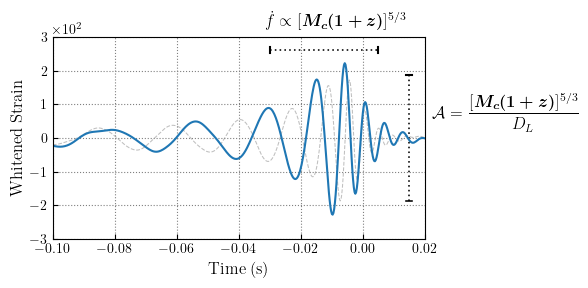

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


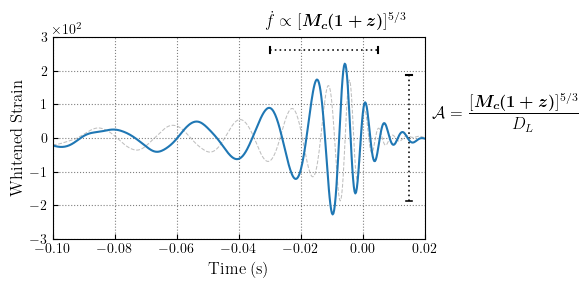

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


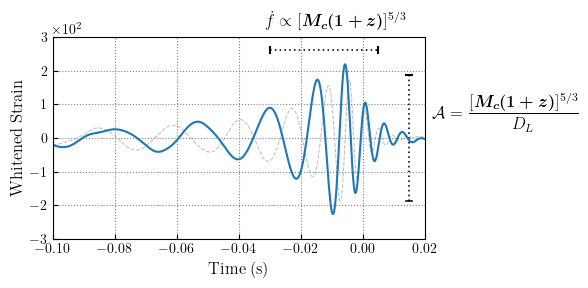

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


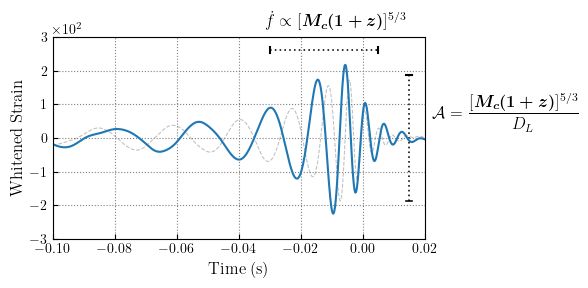

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


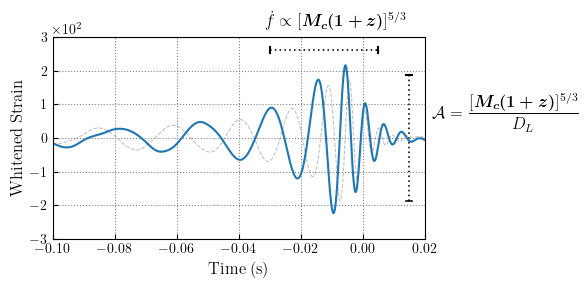

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


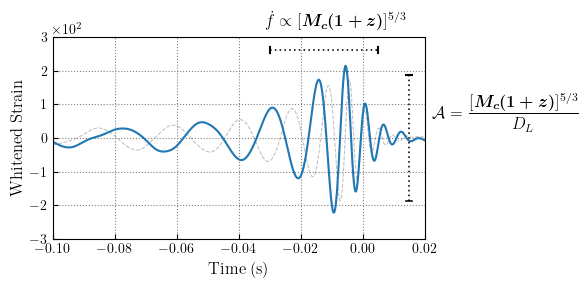

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


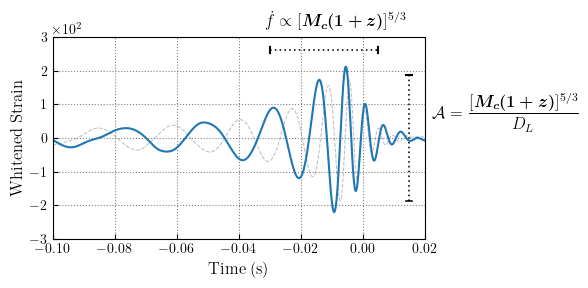

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


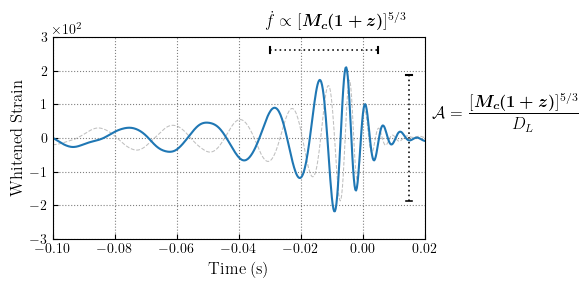

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


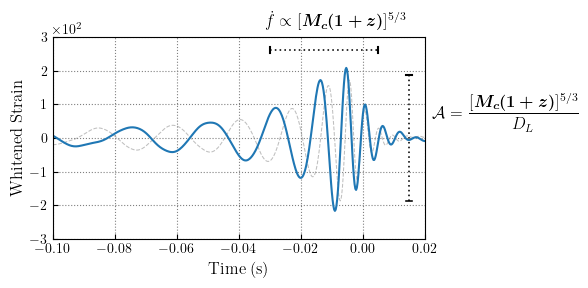

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


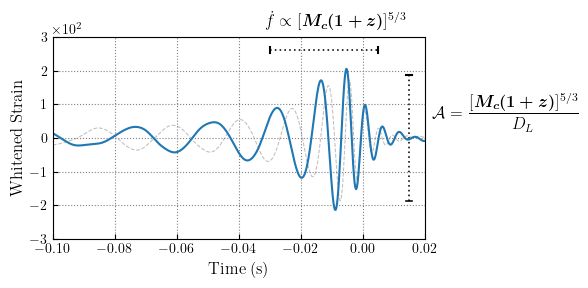

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


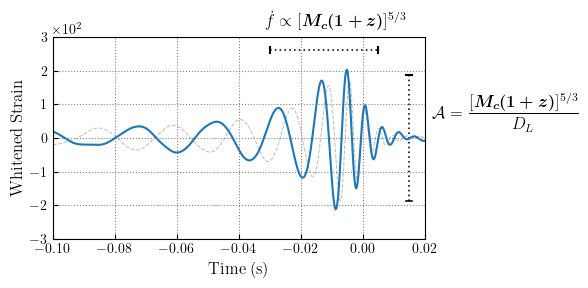

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


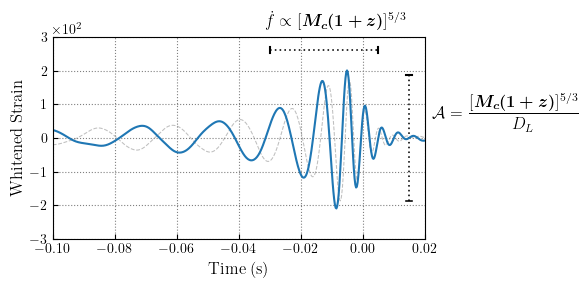

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


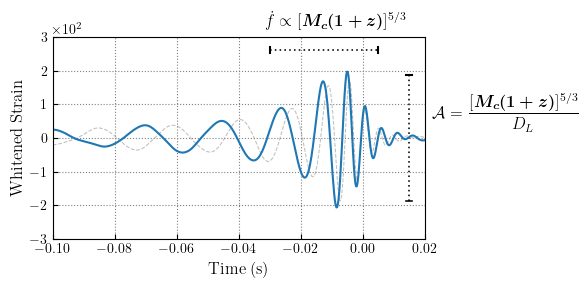

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


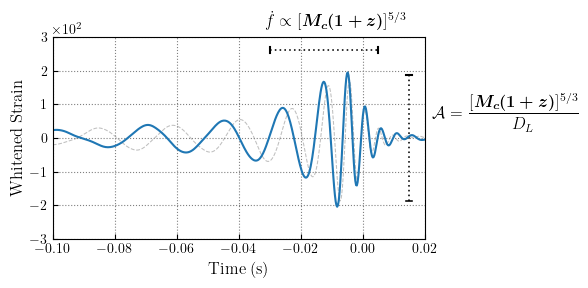

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


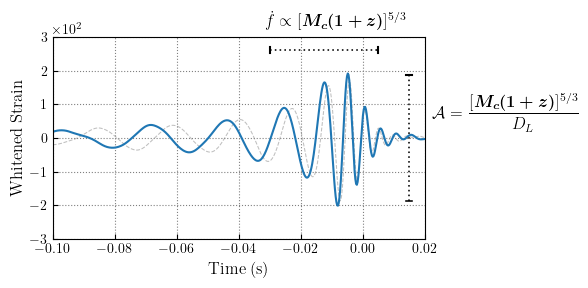

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


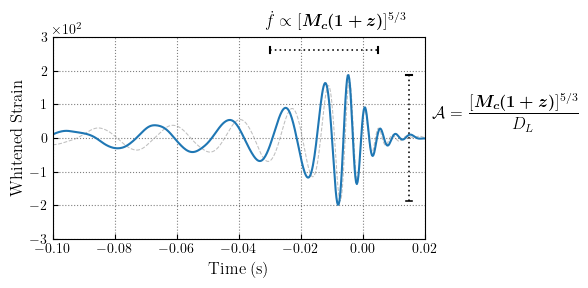

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


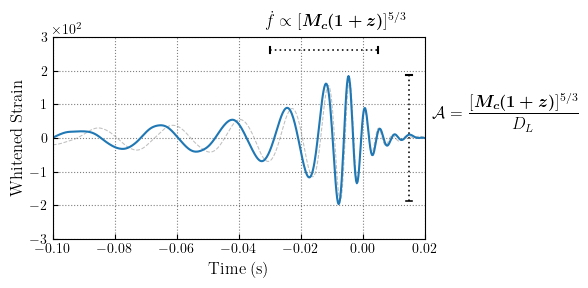

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


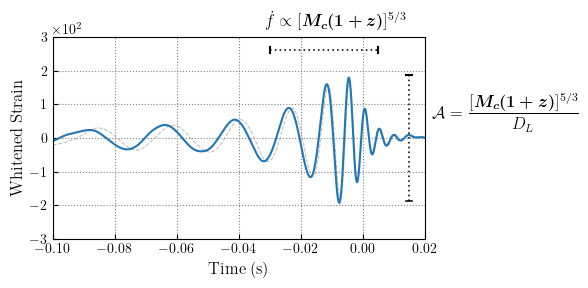

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


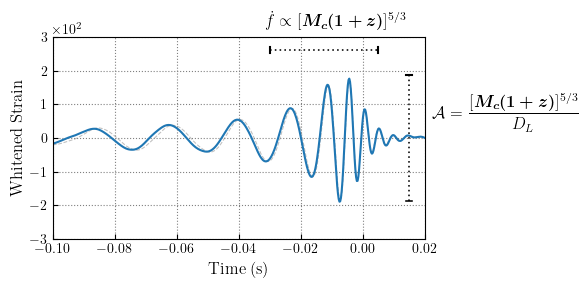

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


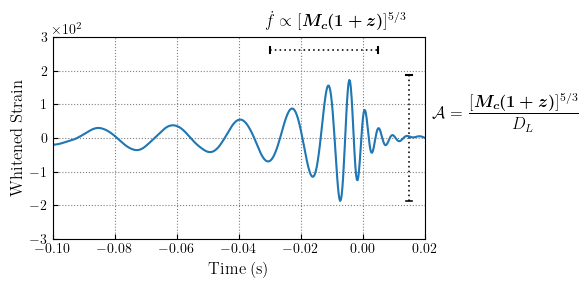

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


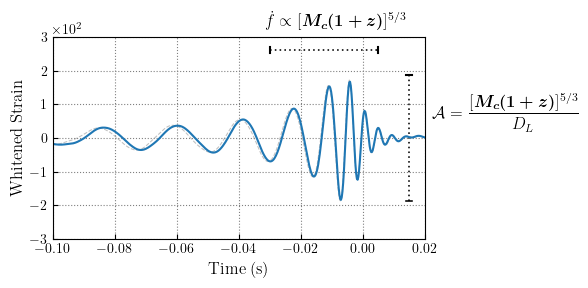

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


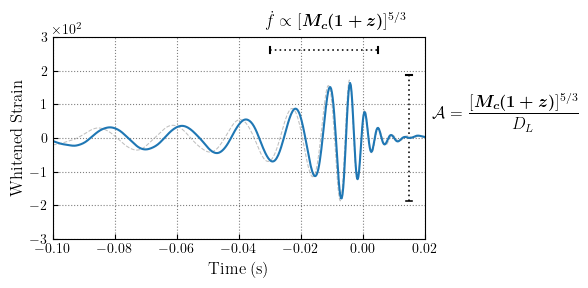

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


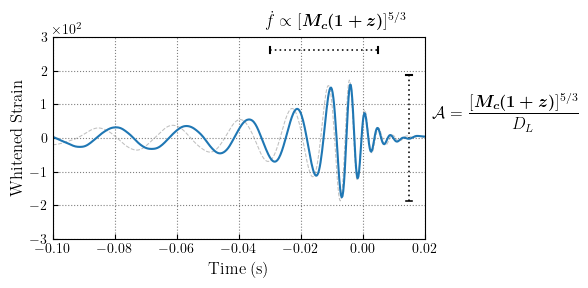

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


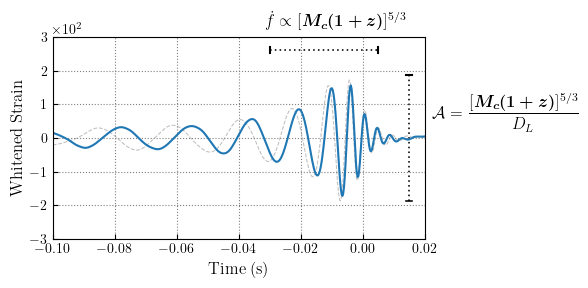

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


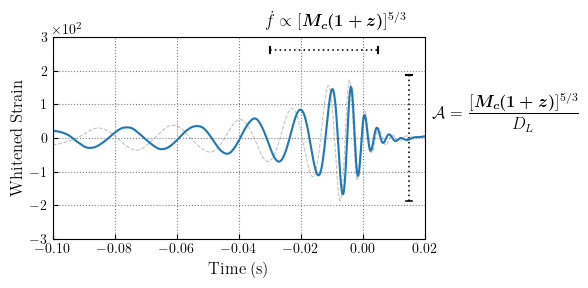

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


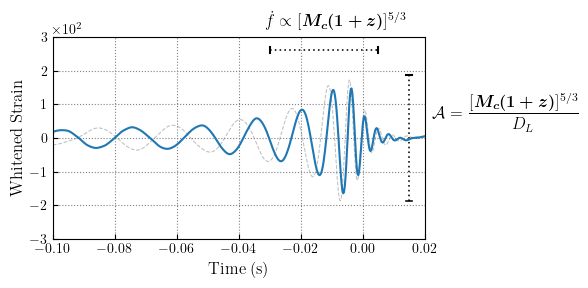

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


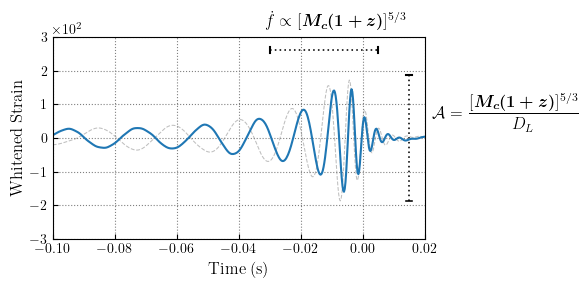

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


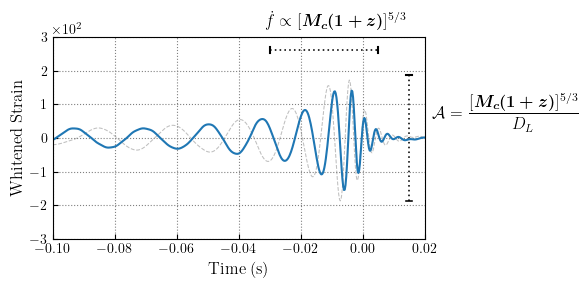

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


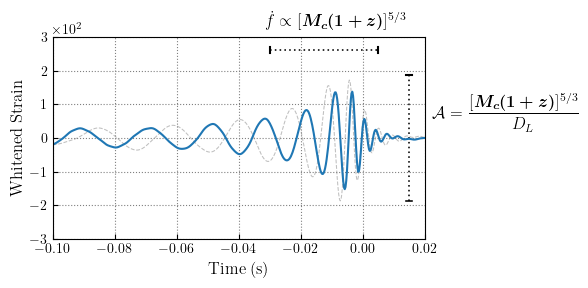

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


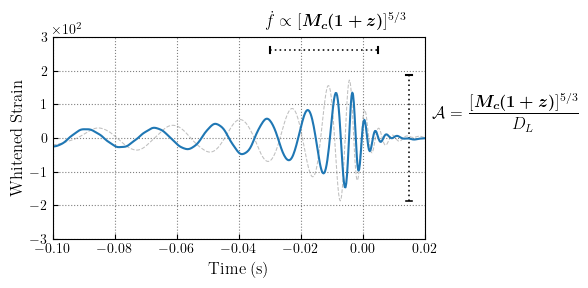

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


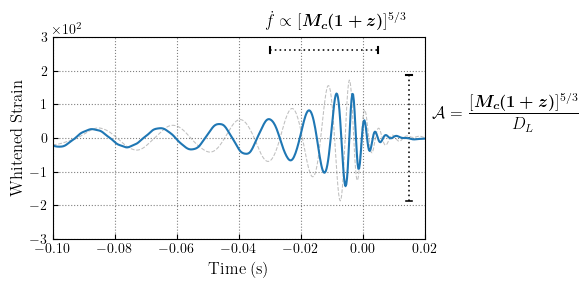

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


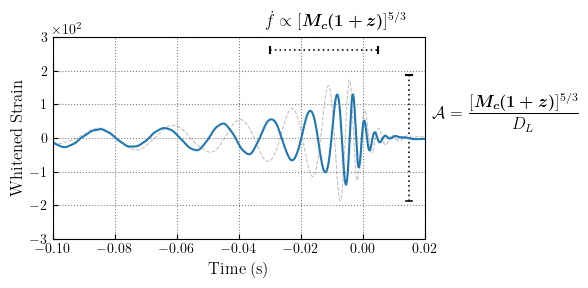

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


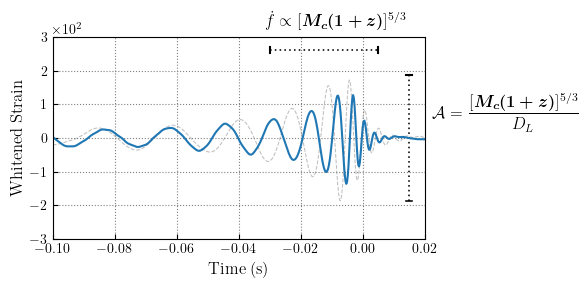

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


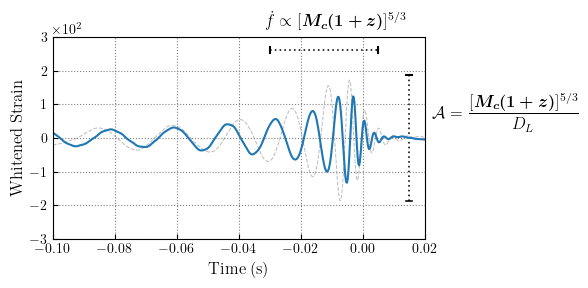

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


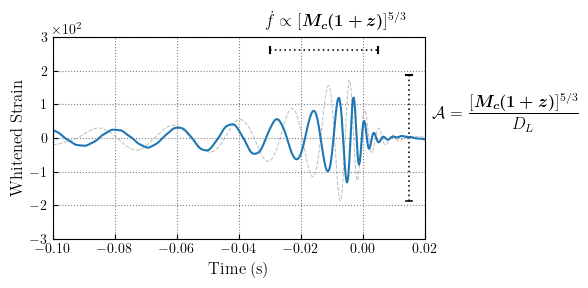

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


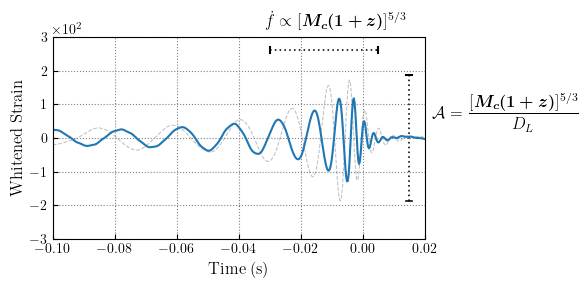

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


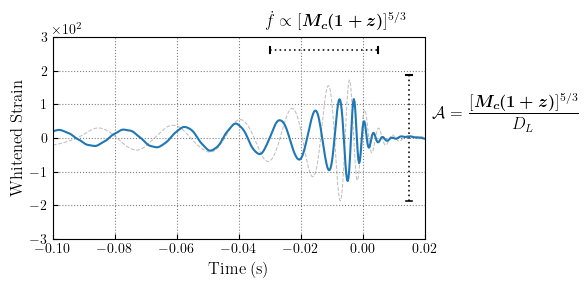

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


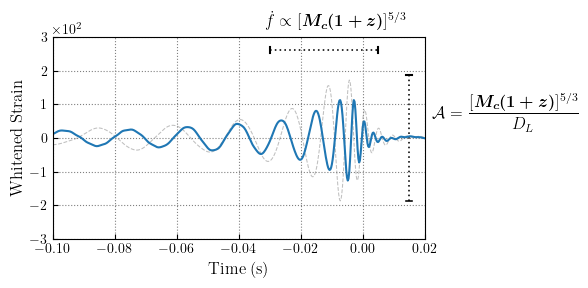

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


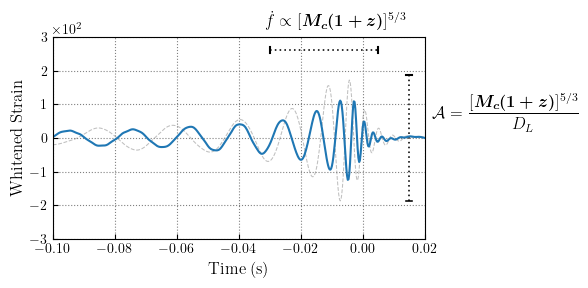

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


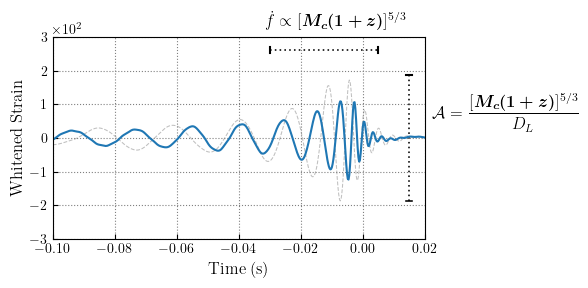

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


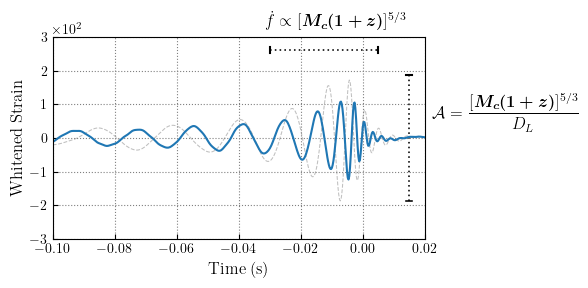

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


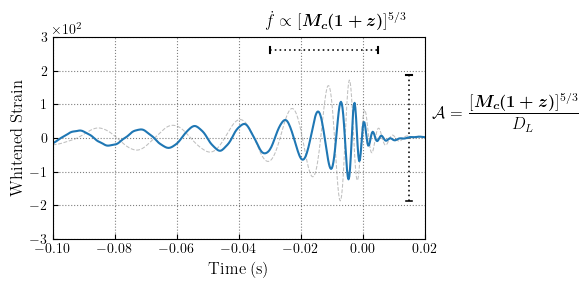

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


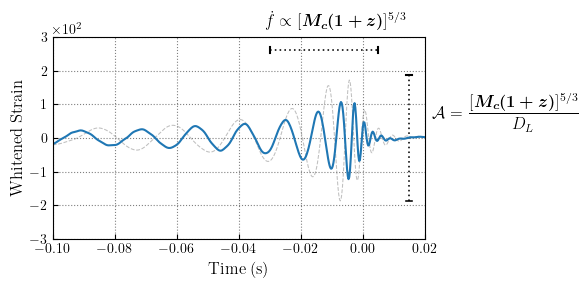

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


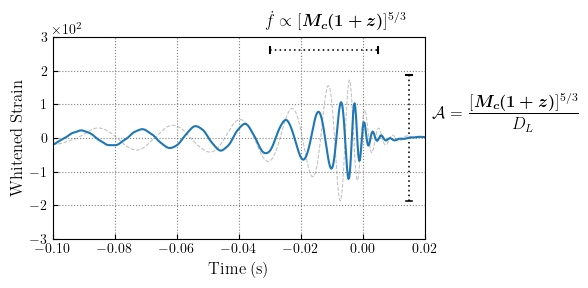

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


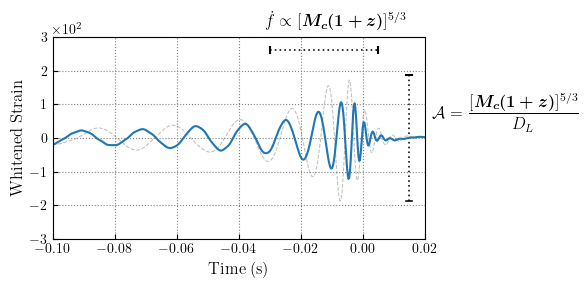

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


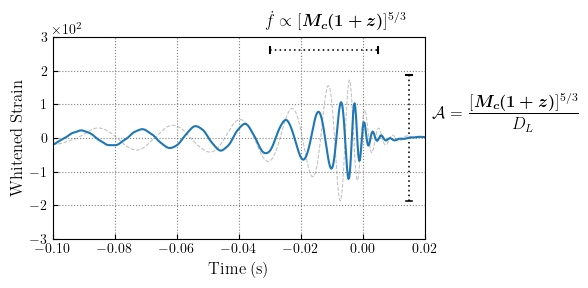

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


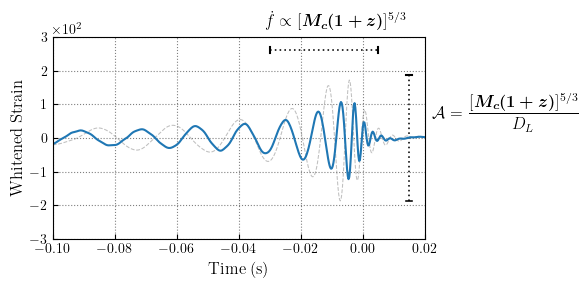

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


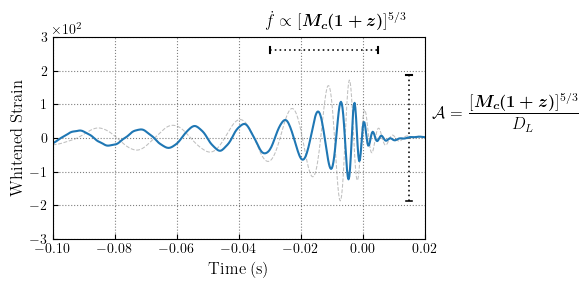

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


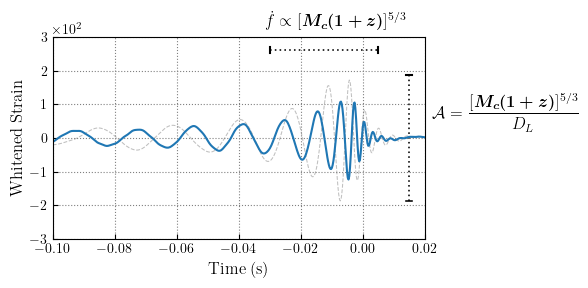

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


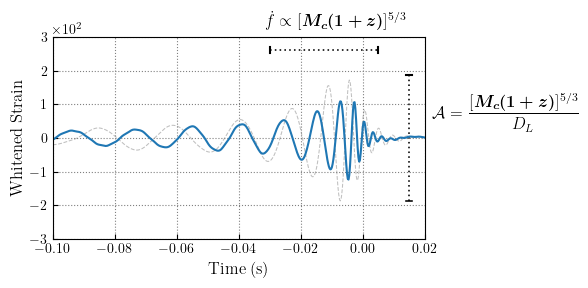

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


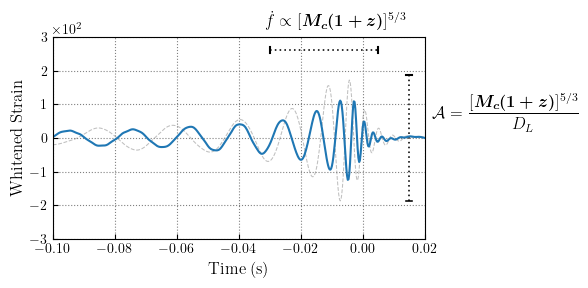

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


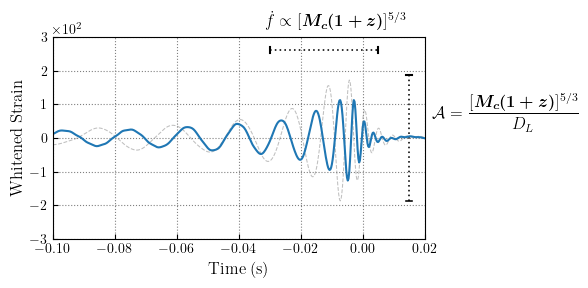

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


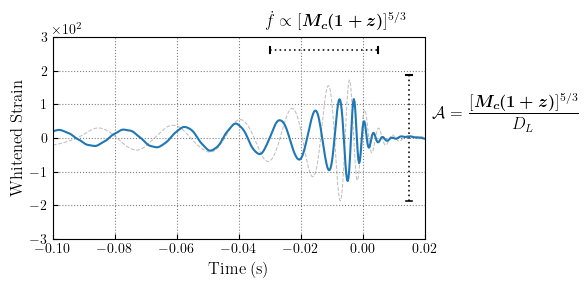

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


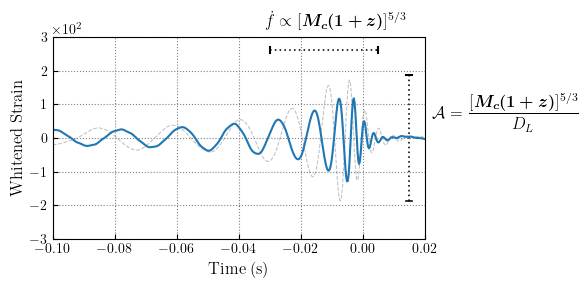

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


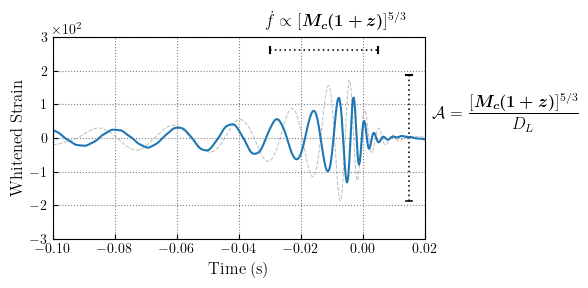

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


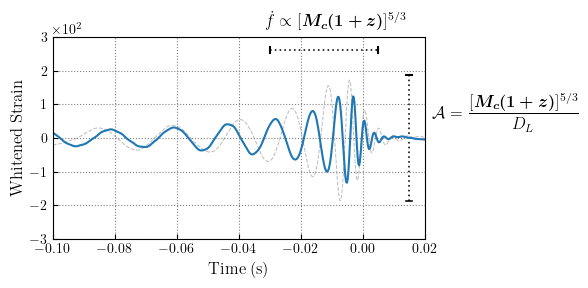

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


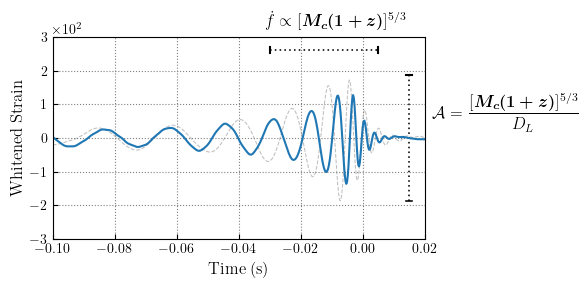

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


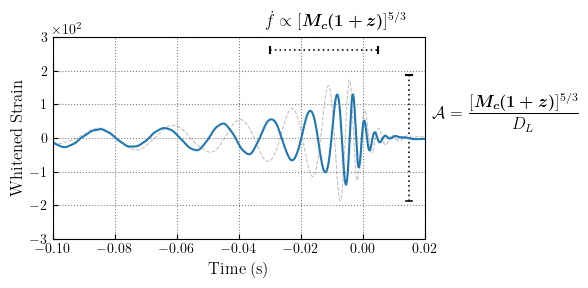

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


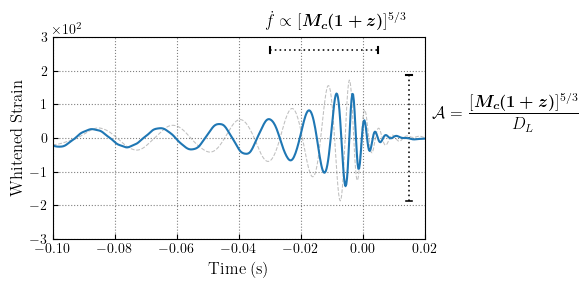

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


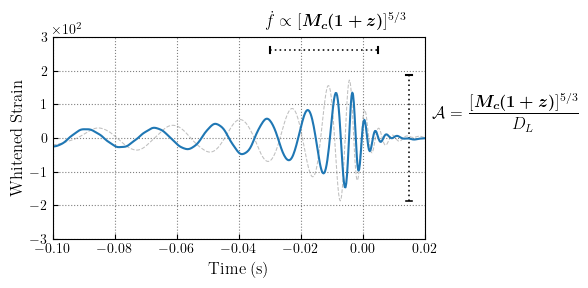

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


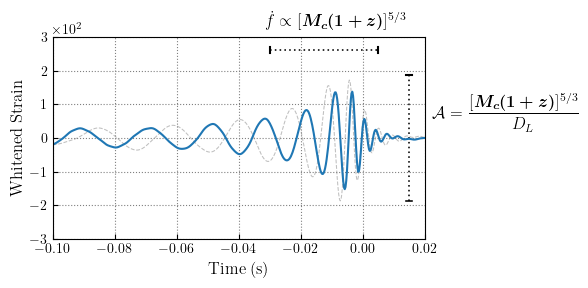

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


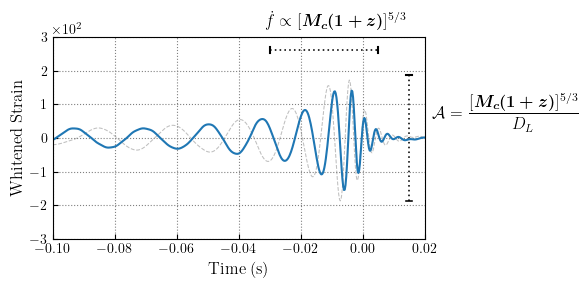

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


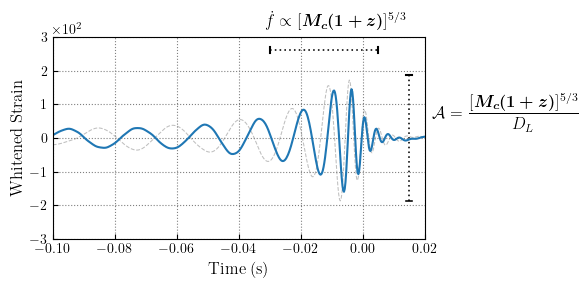

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


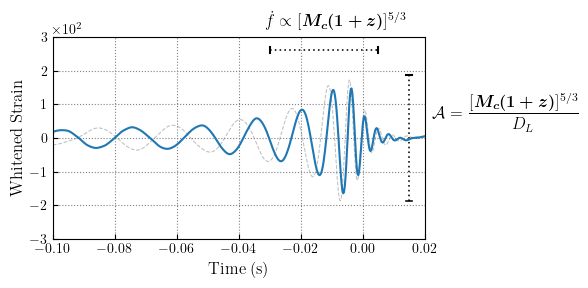

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


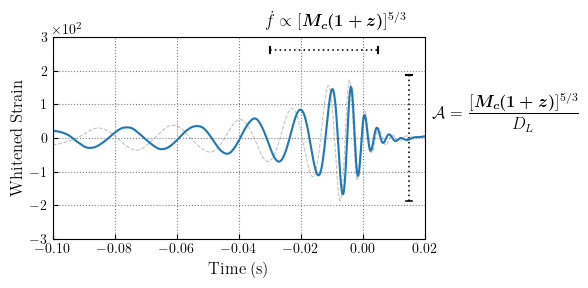

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


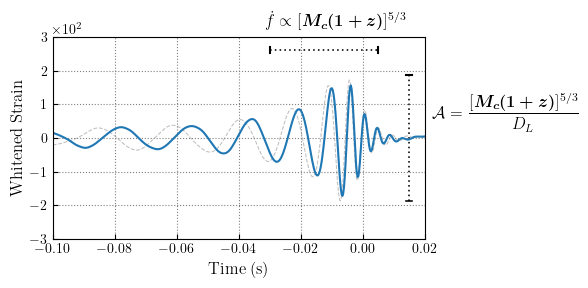

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


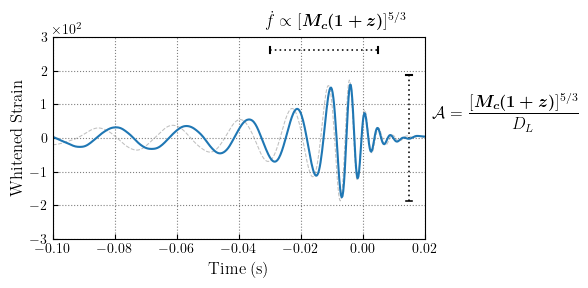

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


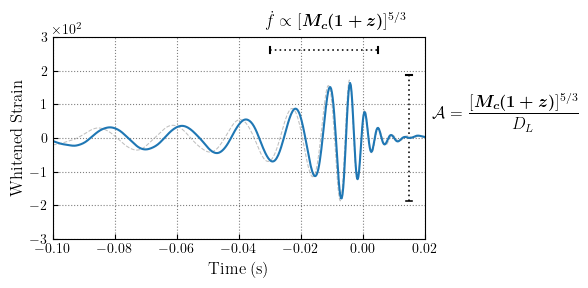

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


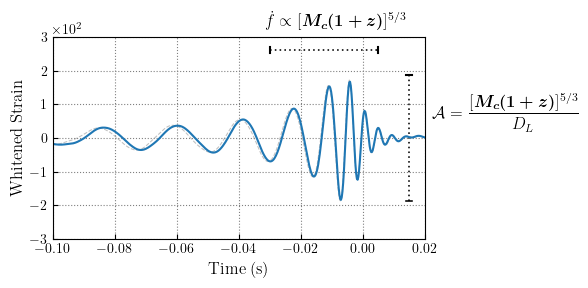

In [128]:
# Number of movie frames to be generated
frames = np.arange(100)

# Range of masses to be explored
ms = 40. + 15.*np.sin(2.*np.pi*frames/100.)

# Loop across frames
for frame,m in zip(frames,ms):
    
    # Set equal masses, and place binary at fiducial distance
    m1=m
    m2=m
    DL = 1000
    
    # Assume 10Hz lower frequency limit and 4096Hz sampling
    dt = 1/4096.
    flow = 10
    
    # Generate waveform
    sptilde, sctilde = waveform.get_td_waveform(approximant="IMRPhenomPv2",
                                                mass1=m1,
                                                mass2=m2,
                                                delta_t=dt,
                                                f_lower=flow,
                                                distance=DL,
                                                coa_phase=0,
                                                spin1z=0.0,
                                                spin2z=0.0)
    
    # Load PSD
    flow = 10.0
    delta_f = 1/sptilde.duration
    flen = int((2048)/delta_f) + 1
    psd_L1_O3 = pycbc.psd.from_txt("aligo_O3actual_H1.txt",flen, delta_f,flow,is_asd_file=True)
    
    # Whiten strain
    sf = sptilde.to_frequencyseries()
    sf_whitened = sf/(psd_L1_O3**0.5)
    sf_whitened._data[sf_whitened._data!=sf_whitened._data] = 0
    sf_whitened._data[np.abs(sf_whitened._data)==np.inf] = 0
    white_strain = sf_whitened.to_timeseries()
    
    # Plot and save frame
    fig,ax = plt.subplots(figsize=(6,3))
    ax.set_rasterization_zorder(1)
    
    ax.plot(white_strain_reference.get_sample_times(),white_strain_reference,color='grey',ls='--',lw=0.75,alpha=0.5)
    ax.plot(white_strain.get_sample_times(),white_strain)
    
    ax.plot([0.015,0.015],[-peak_strain,peak_strain],color='black',lw=1.15,zorder=-1,dashes=(1,2))
    ax.plot([0.014,0.016],[peak_strain,peak_strain],color='black',lw=1.5,zorder=-1)
    ax.plot([0.014,0.016],[-peak_strain,-peak_strain],color='black',lw=1.15,zorder=-1)

    ax.plot([-0.03,0.005],[1.4*peak_strain,1.4*peak_strain],color='black',lw=1.15,zorder=-1,dashes=(1,2))
    ax.plot([-0.03,-0.03],[1.35*peak_strain,1.45*peak_strain],color='black',lw=1.5,zorder=-1)
    ax.plot([0.005,0.005],[1.35*peak_strain,1.45*peak_strain],color='black',lw=1.5,zorder=-1)

    ax.text(1.02,0.6,r'$\mathcal{A} = \displaystyle\frac{[\bm{M_c(1+z)}]^{5/3}}{D_L}$',transform=ax.transAxes,fontsize=12)
    ax.text(0.57,1.06,r'$\dot f \propto [\bm{M_c (1+z)}]^{5/3}$',transform=ax.transAxes,fontsize=12)
    
    ax.set_xlim(-0.1,0.02)
    ax.set_ylim(-3e2,3e2)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Whitened Strain')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    plt.tight_layout()
    plt.savefig('step_1_varying_mass_frames/adjust_mass_{0:03d}.jpg'.format(frame),bbox_inches='tight',dpi=400)
    plt.show()

# 2. Frames illustrated effect of varying luminosity distance

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


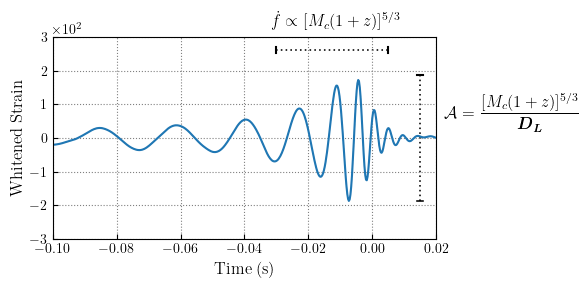

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


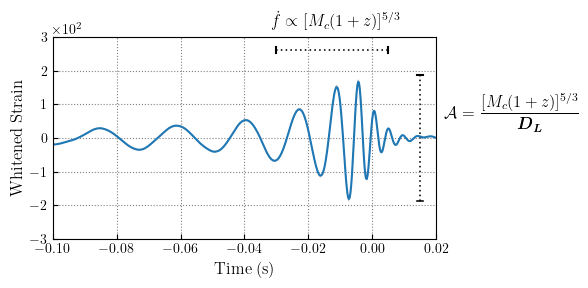

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


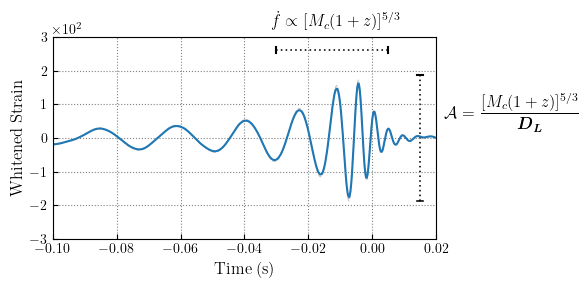

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


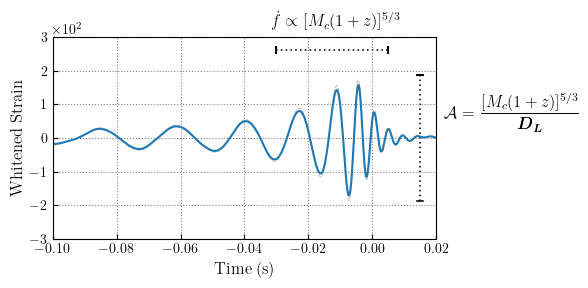

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


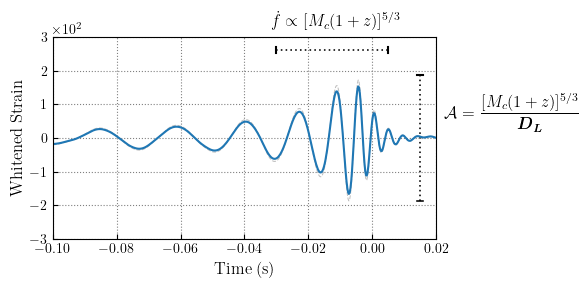

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


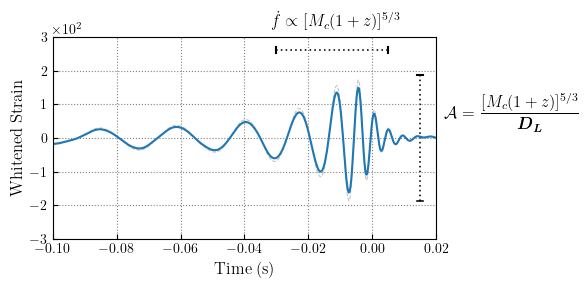

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


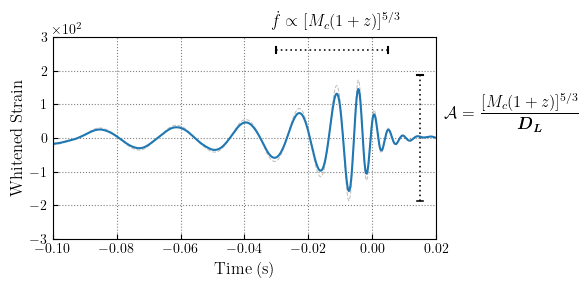

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


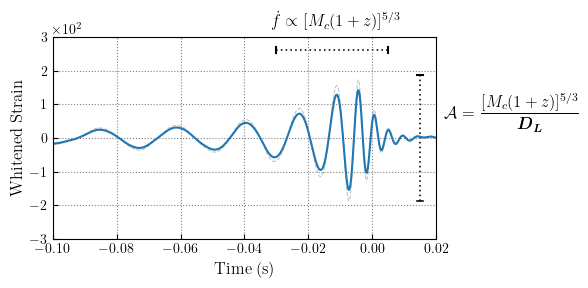

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


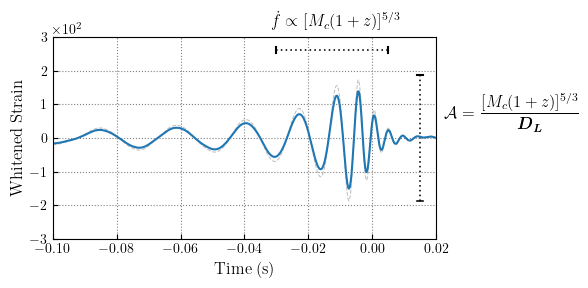

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


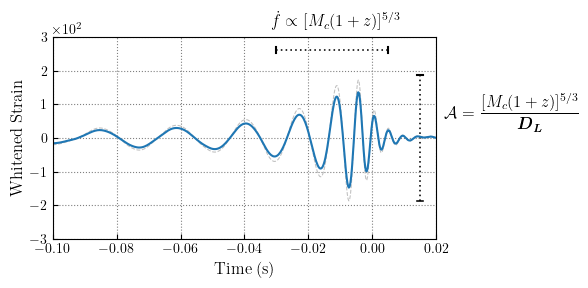

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


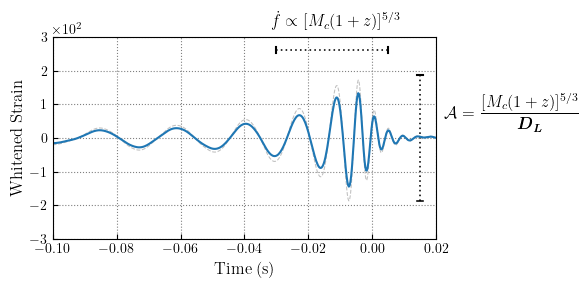

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


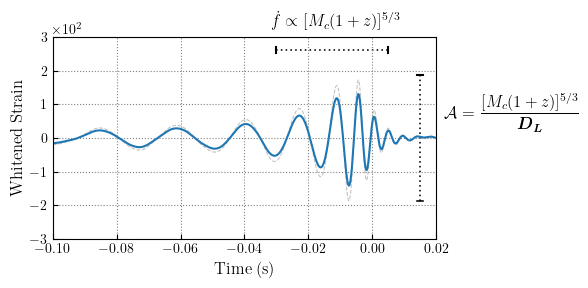

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


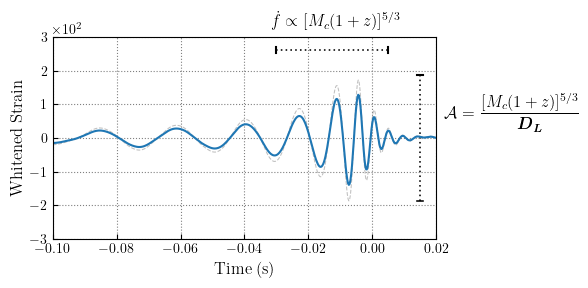

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


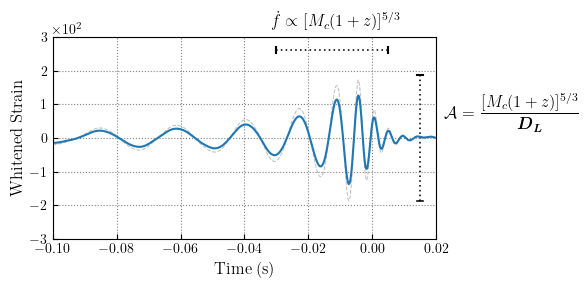

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


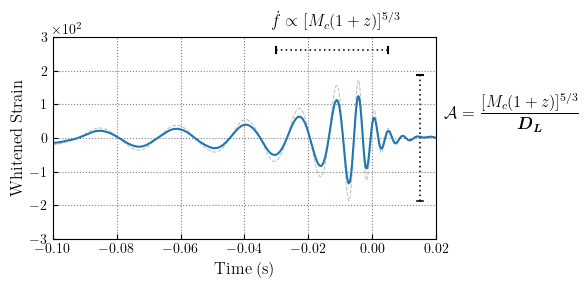

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


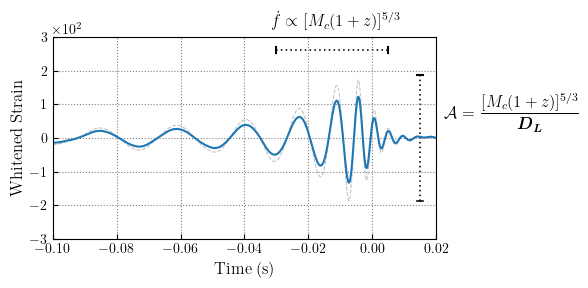

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


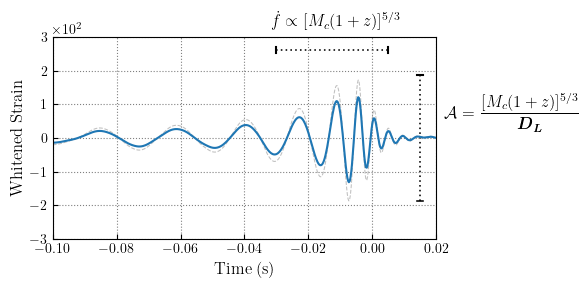

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


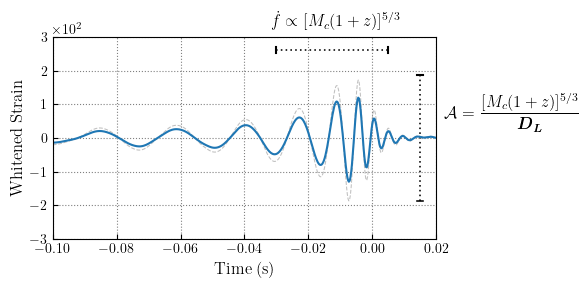

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


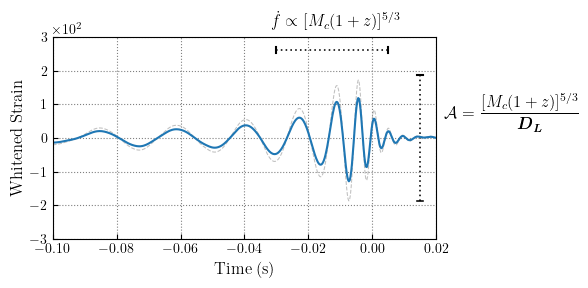

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


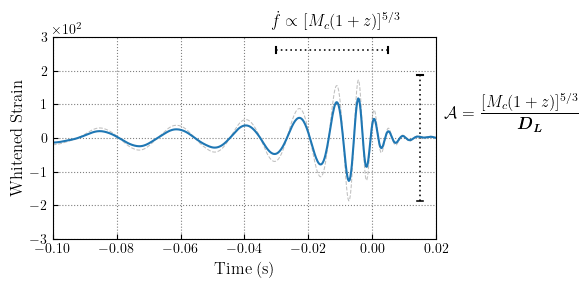

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


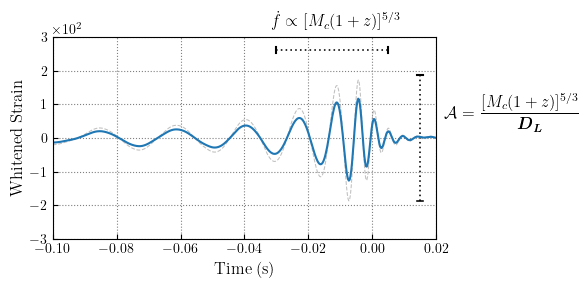

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


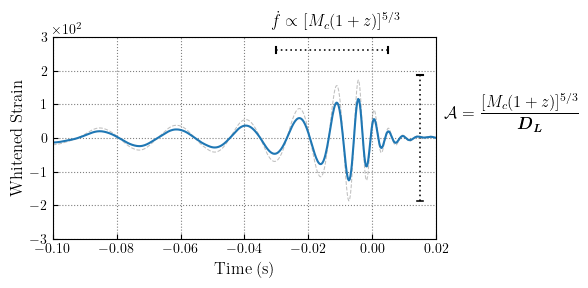

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


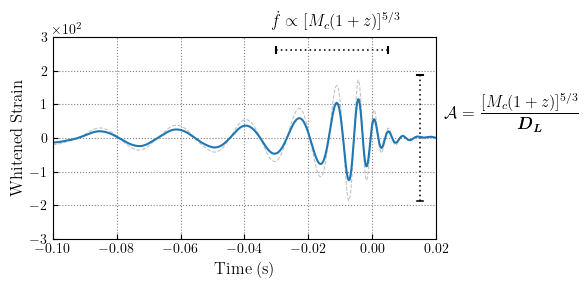

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


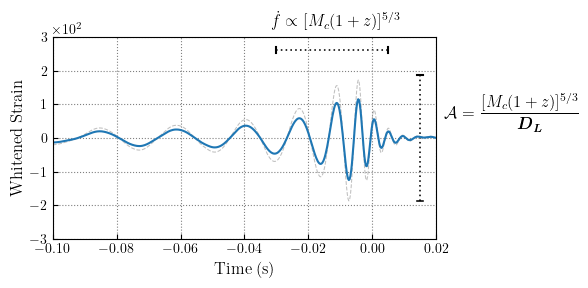

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


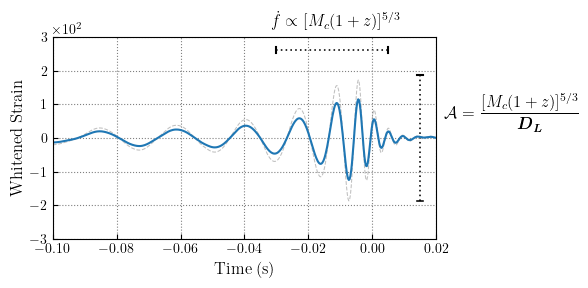

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


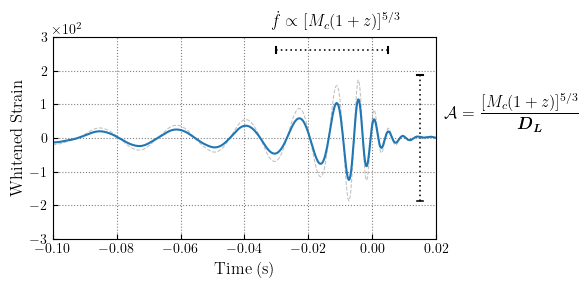

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


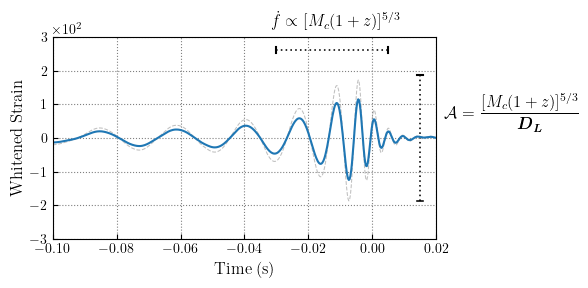

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


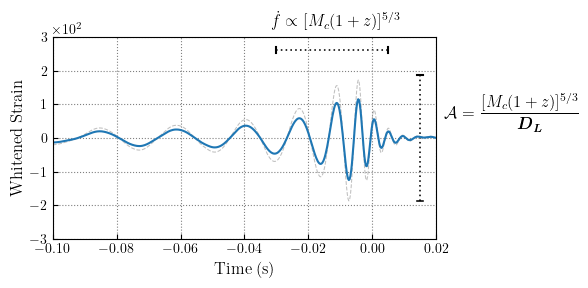

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


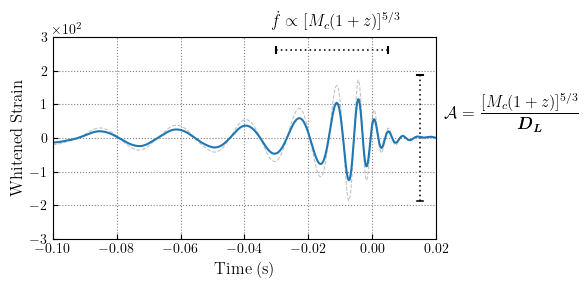

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


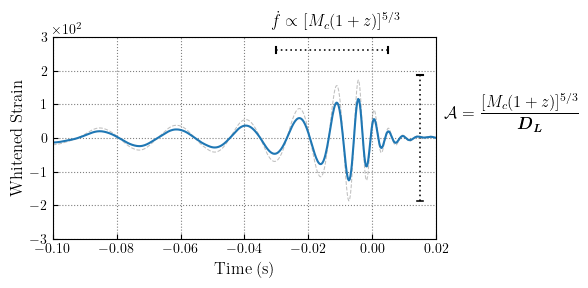

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


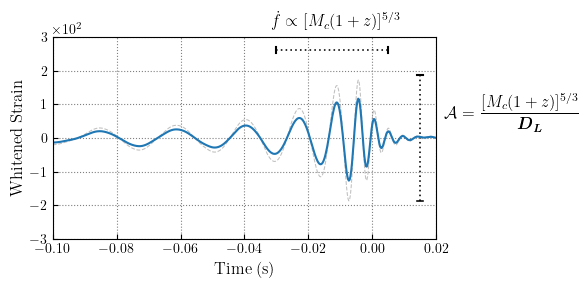

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


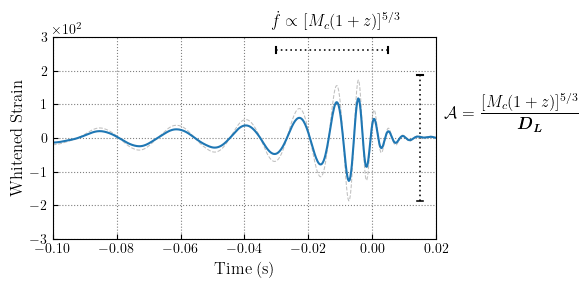

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


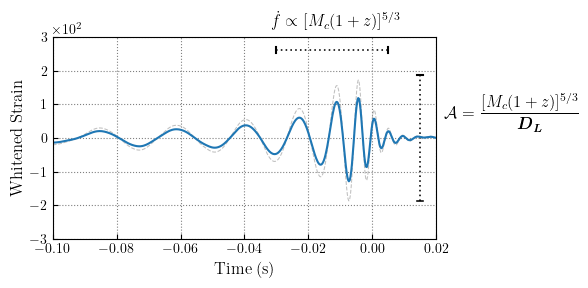

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


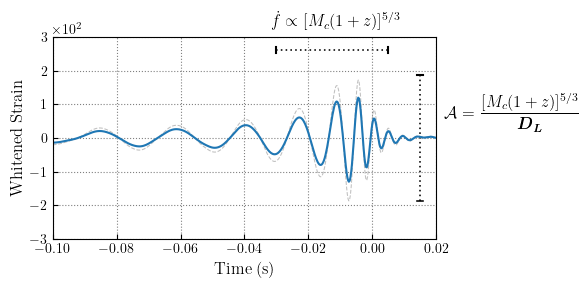

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


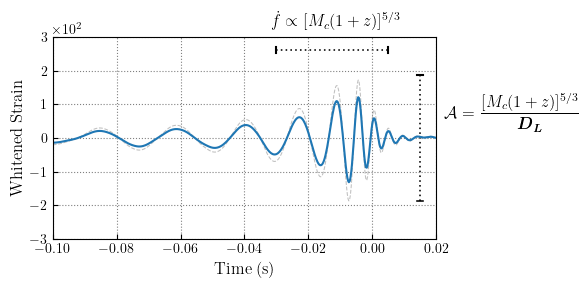

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


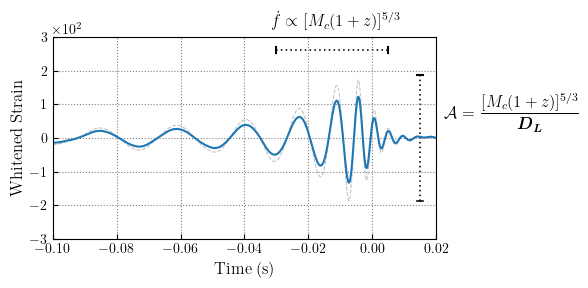

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


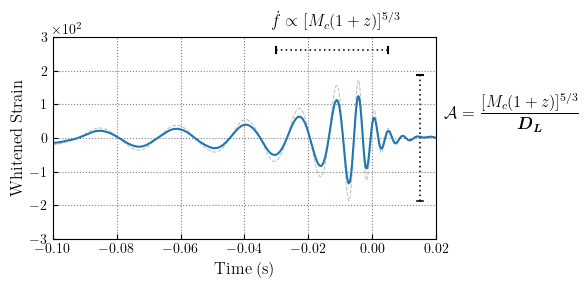

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


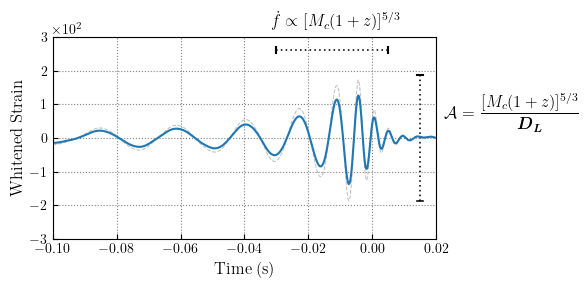

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


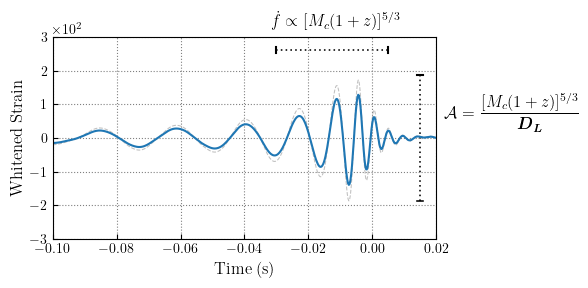

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


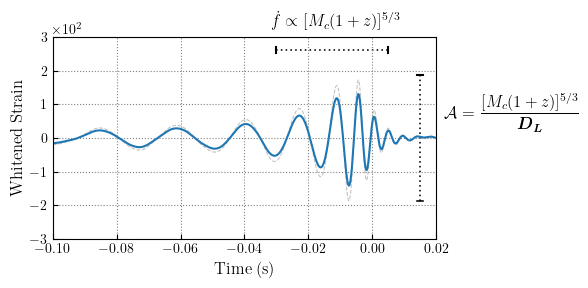

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


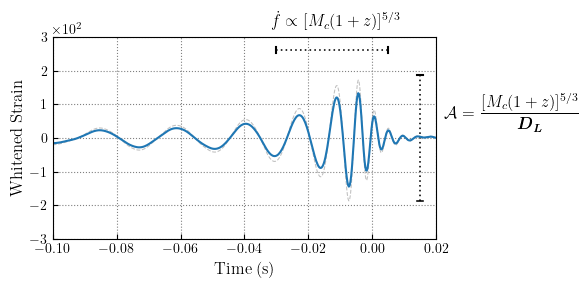

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


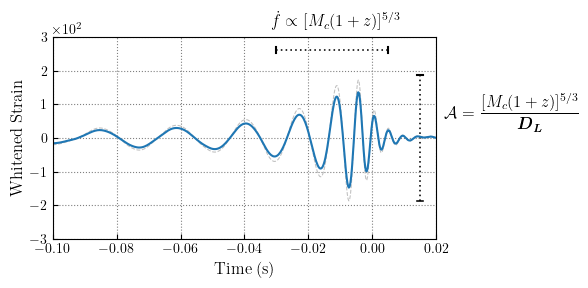

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


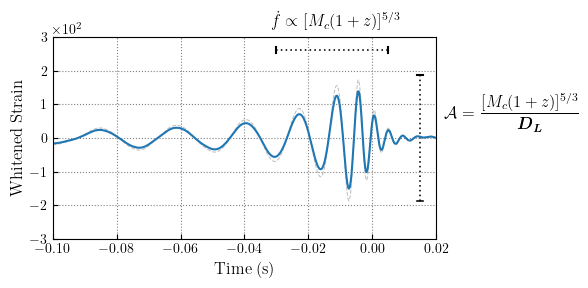

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


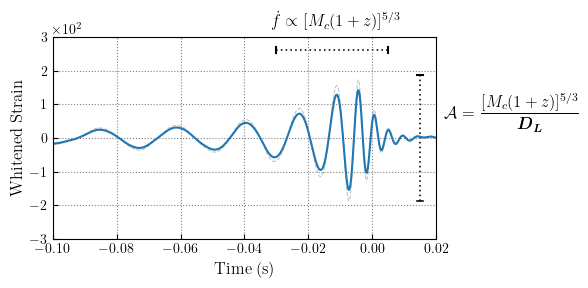

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


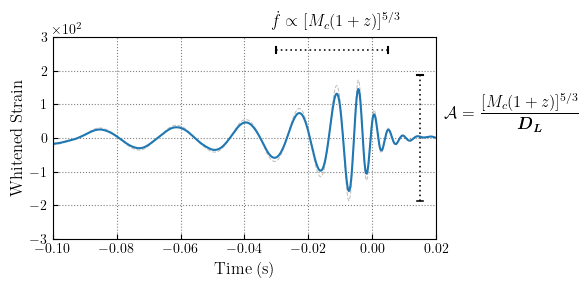

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


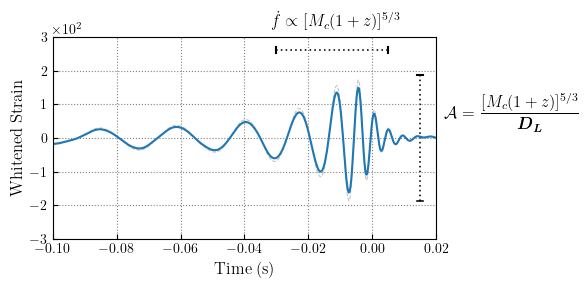

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


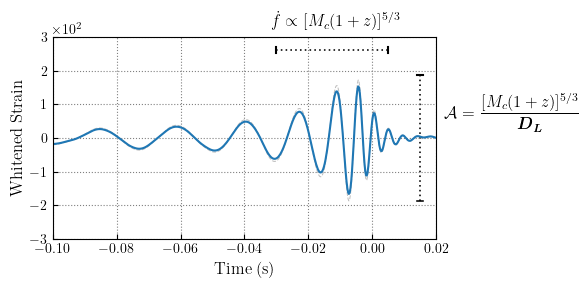

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


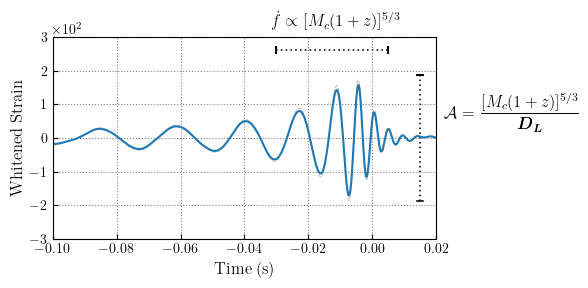

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


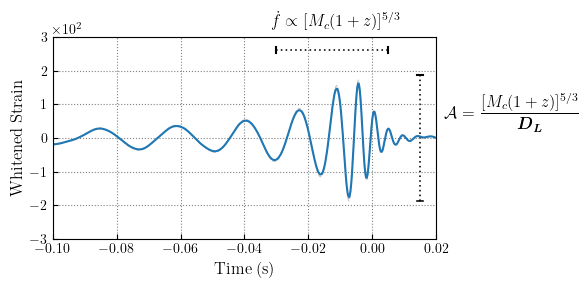

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


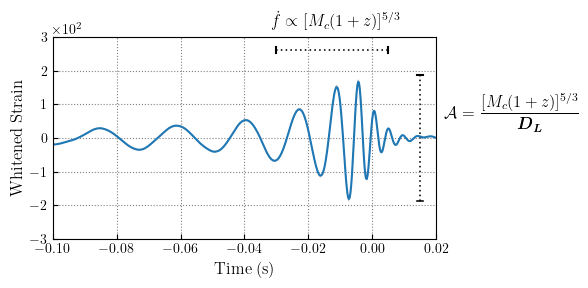

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


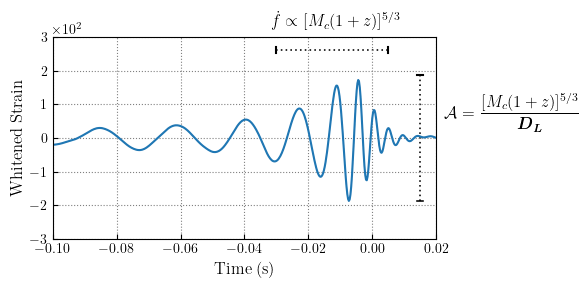

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


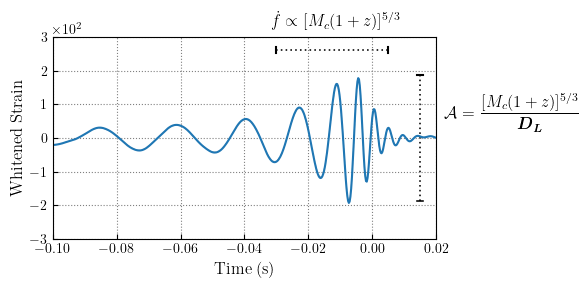

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


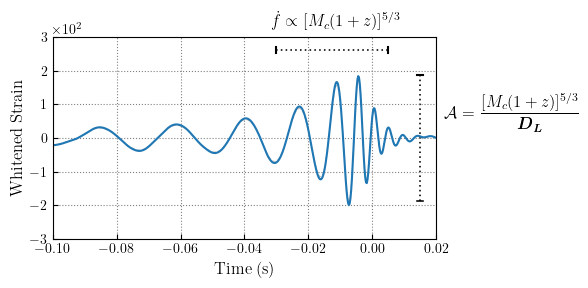

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


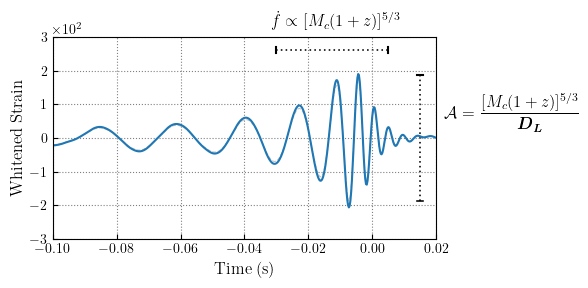

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


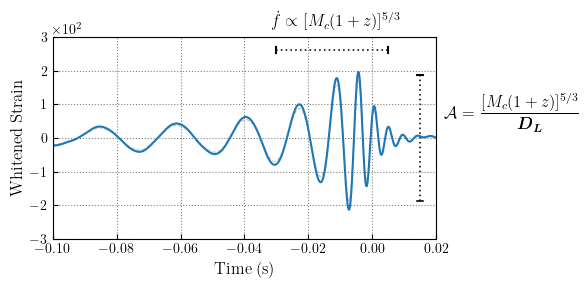

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


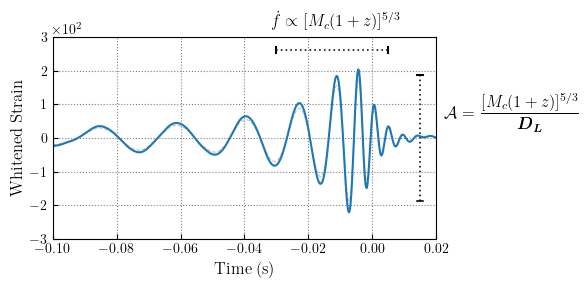

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


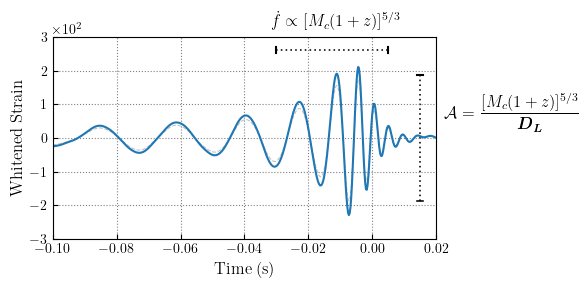

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


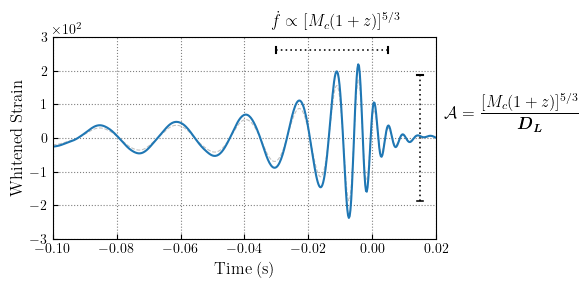

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


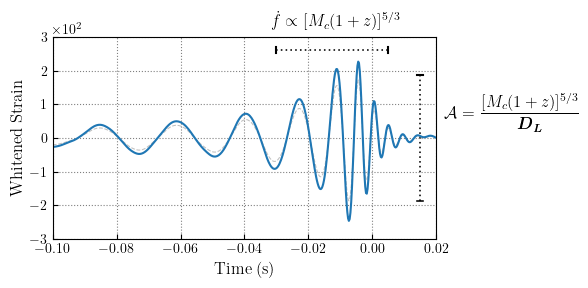

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


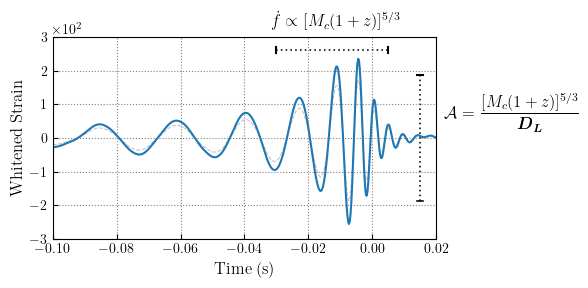

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


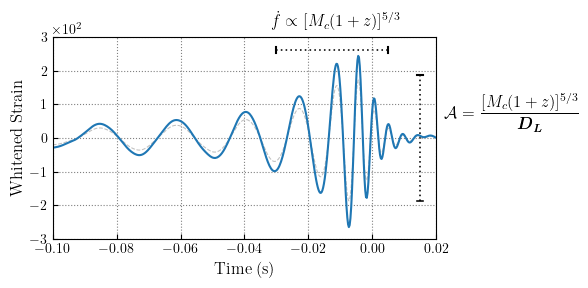

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


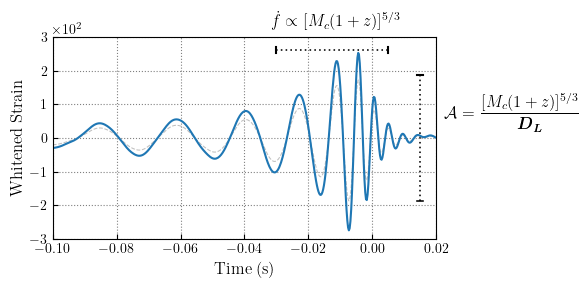

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


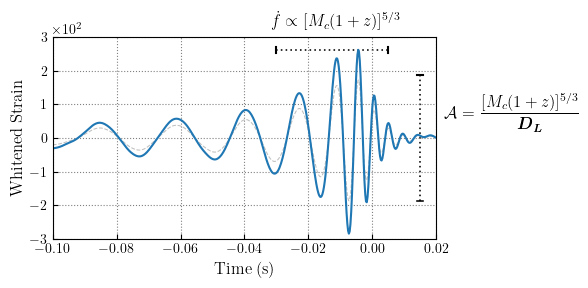

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


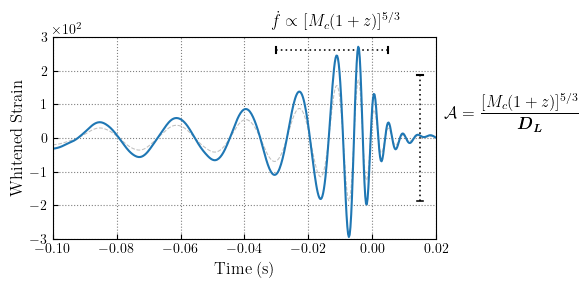

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


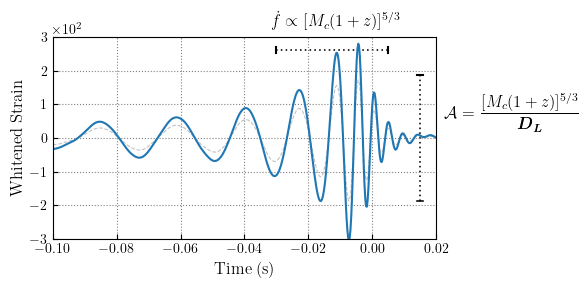

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


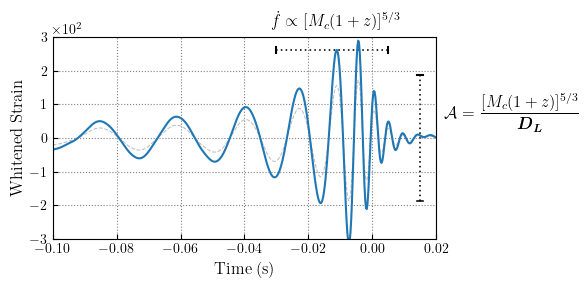

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


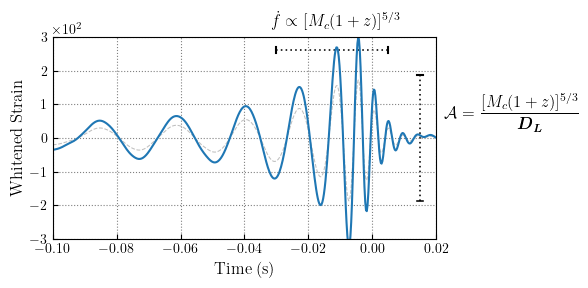

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


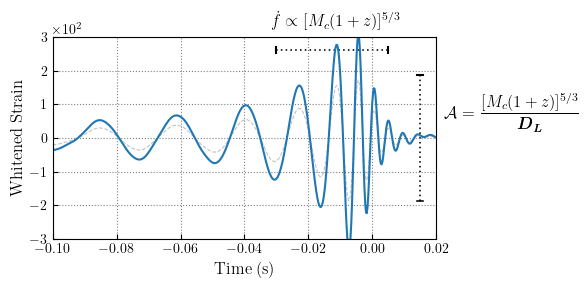

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


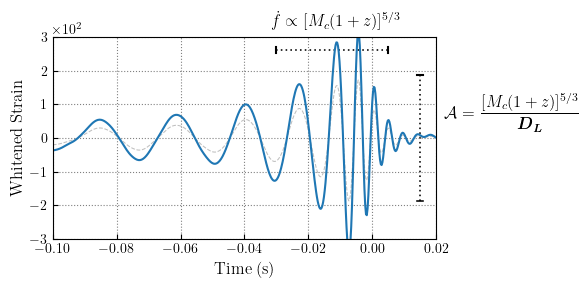

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


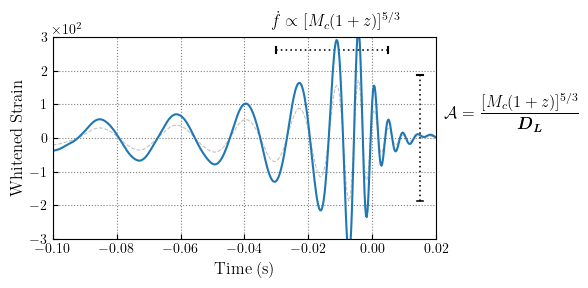

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


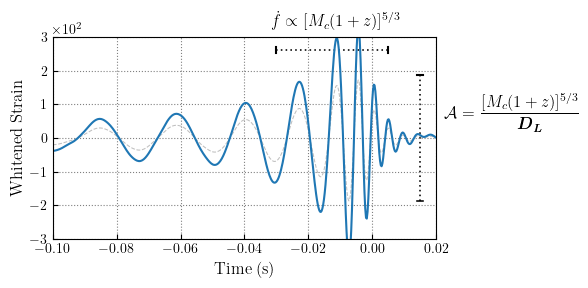

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


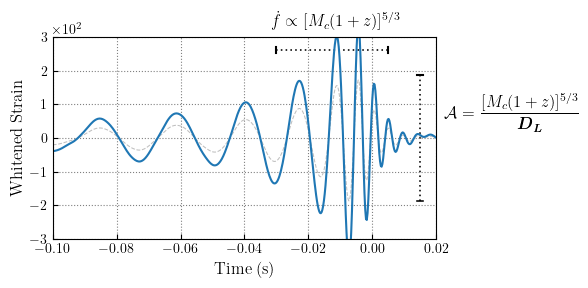

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


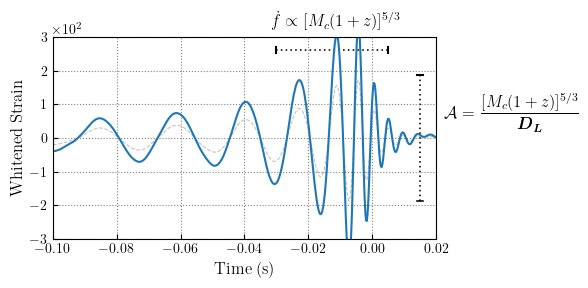

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


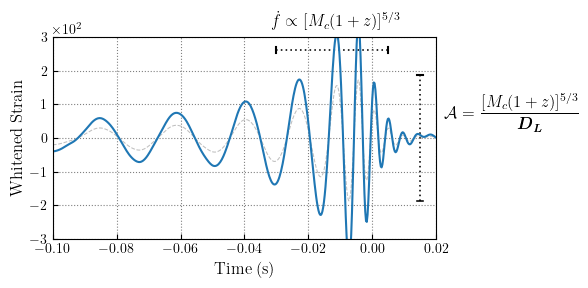

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


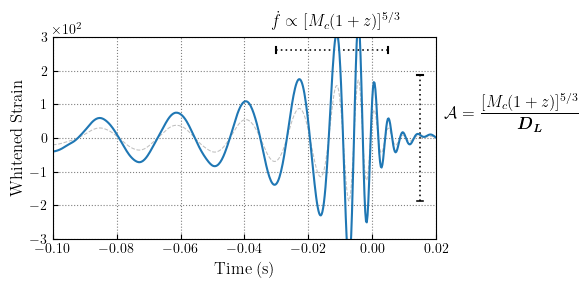

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


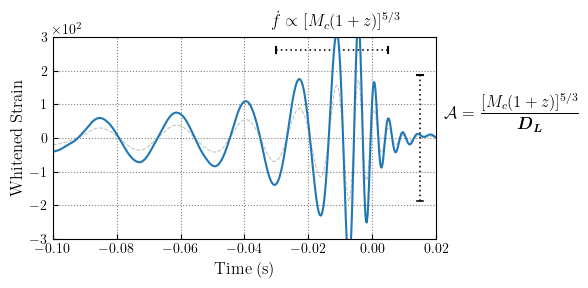

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


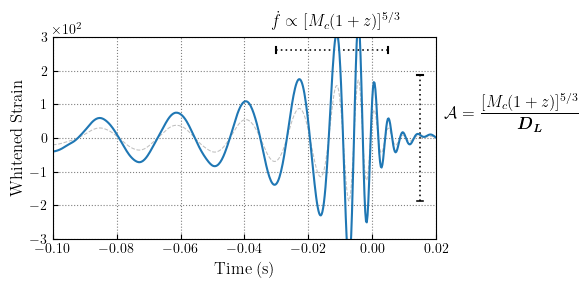

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


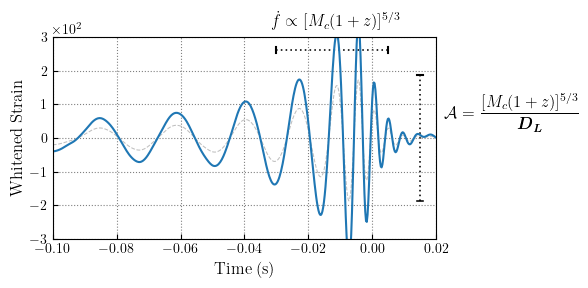

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


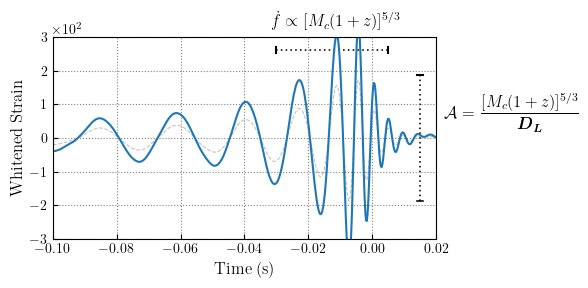

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


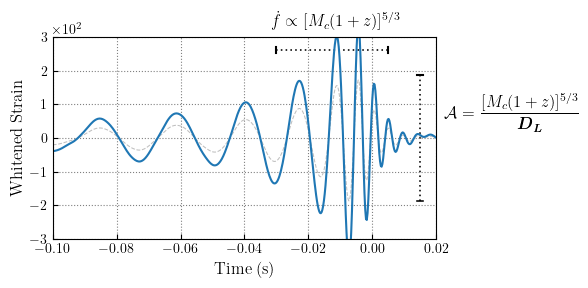

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


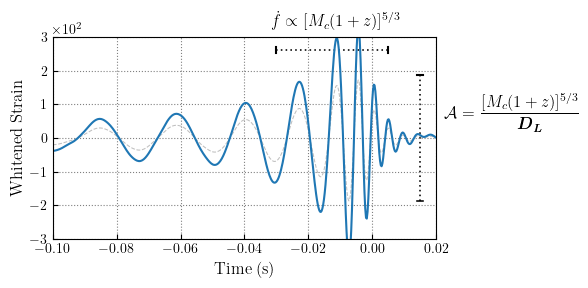

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


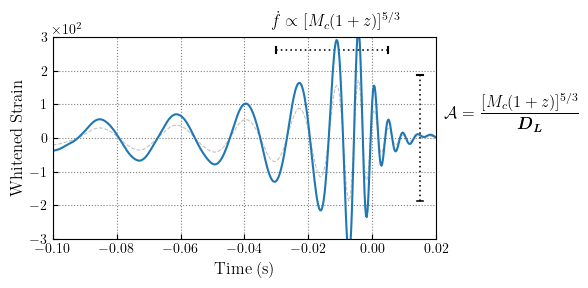

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


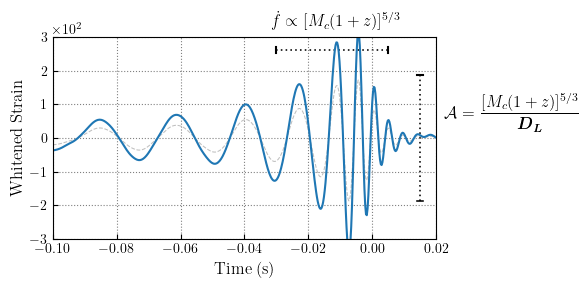

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


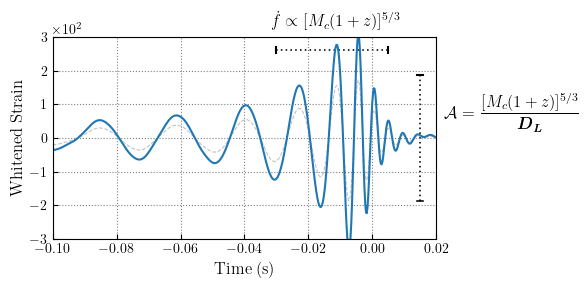

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


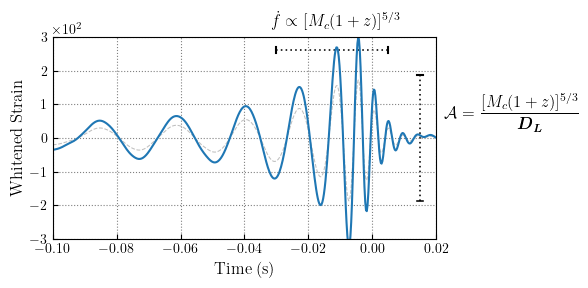

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


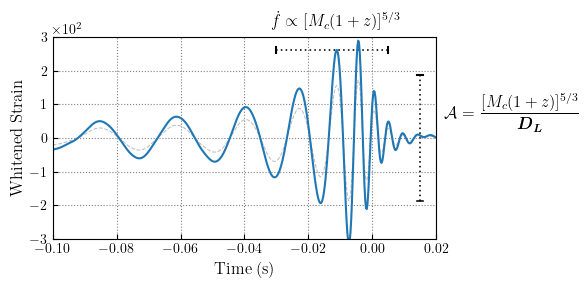

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


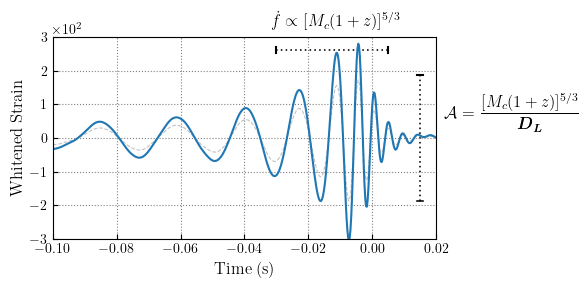

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


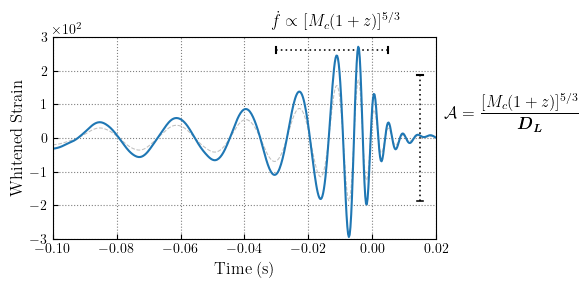

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


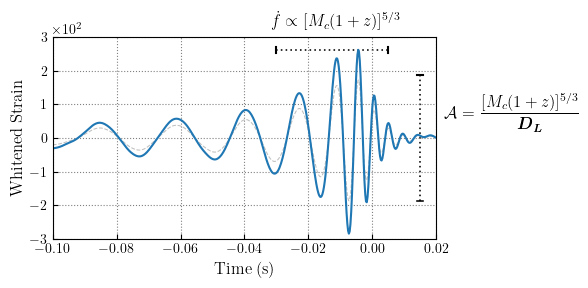

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


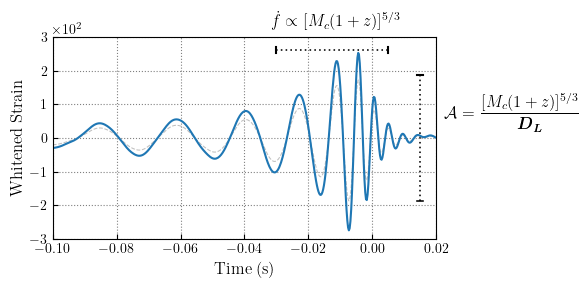

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


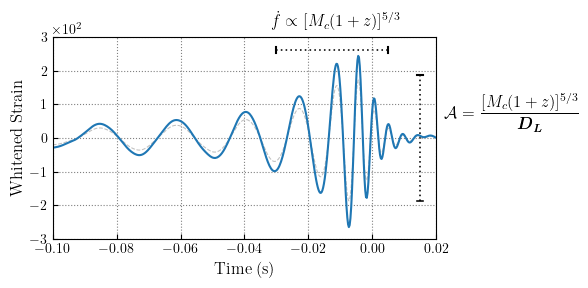

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


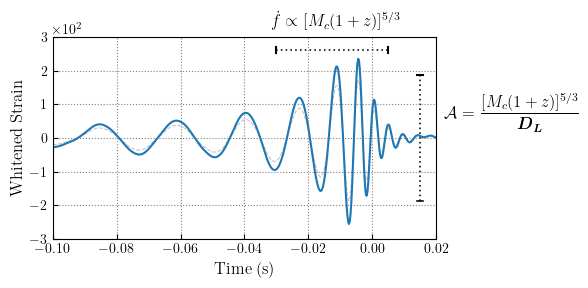

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


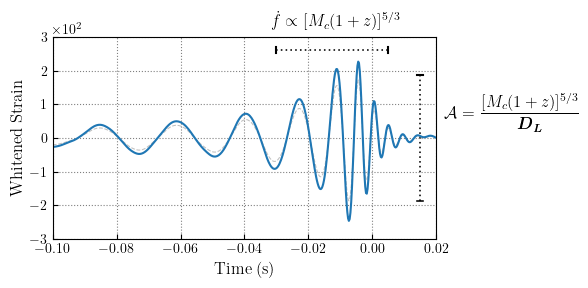

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


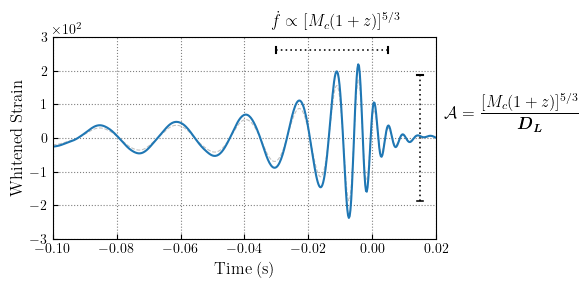

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


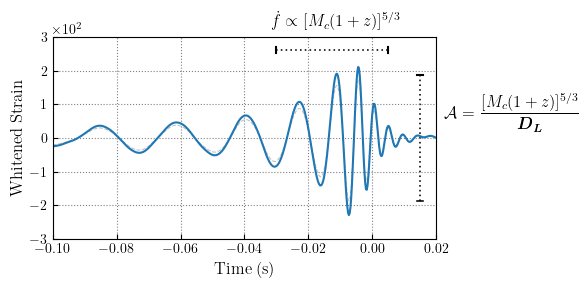

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


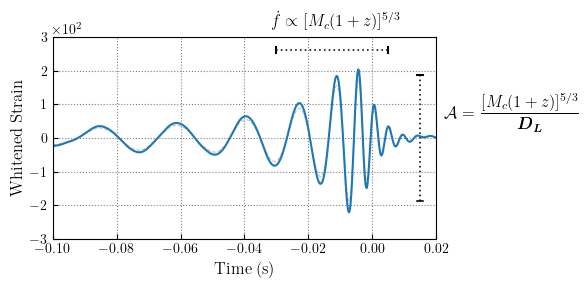

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


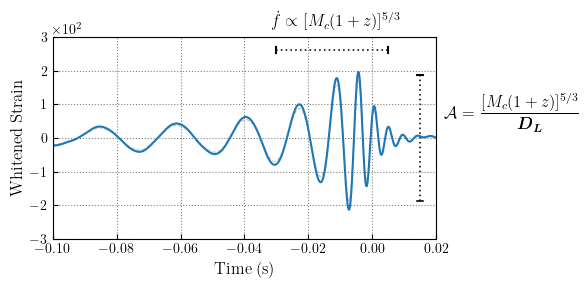

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


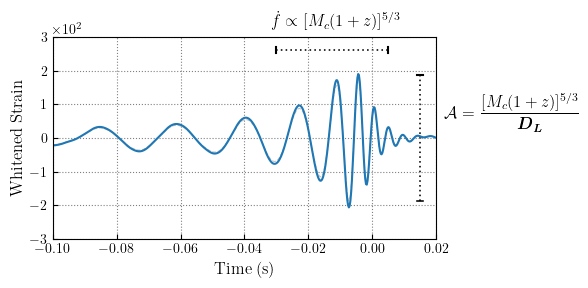

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


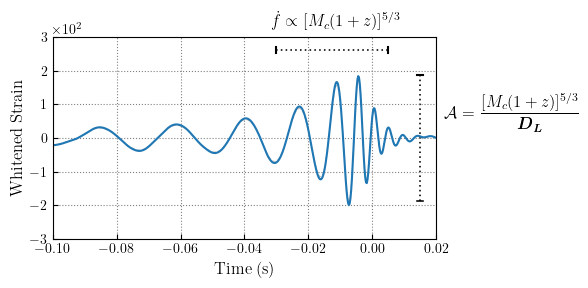

/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: divide by zero encountered in divide
  return self._data / other
/opt/miniconda3/envs/work/lib/python3.9/site-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other


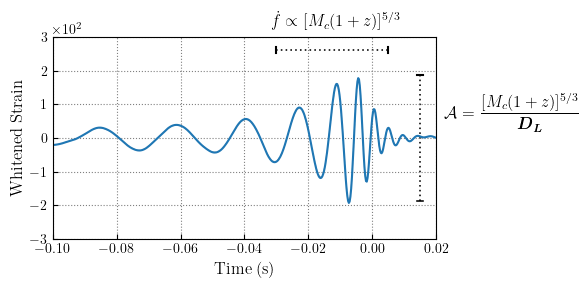

In [130]:
# Number of movie frames to be generated
frames = np.arange(100)

# Range of distances to explore
Ds = 1000. + 500.*np.sin(2.*np.pi*frames/100.)

for frame,D in zip(frames,Ds):
    
    # Generate waveform
    m1=40.
    m2=40.
    DL = D
    z = z_at_value(Planck15.luminosity_distance,DL*u.Mpc)
    dt = 1/4096.
    flow = 10
    sptilde, sctilde = waveform.get_td_waveform(approximant="IMRPhenomPv2",
                                                mass1=m1,
                                                mass2=m2,
                                                delta_t=dt,
                                                f_lower=flow,
                                                distance=DL,
                                                coa_phase=0,
                                                spin1z=0.0,
                                                spin2z=0.0)
    
    # Load PSD
    flow = 10.0
    delta_f = 1/sptilde.duration
    flen = int((2048)/delta_f) + 1
    psd_L1_O3 = pycbc.psd.from_txt("aligo_O3actual_H1.txt",flen, delta_f,flow,is_asd_file=True)
    
    # Whiten
    sf = sptilde.to_frequencyseries()
    sf_whitened = sf/(psd_L1_O3**0.5)
    sf_whitened._data[sf_whitened._data!=sf_whitened._data] = 0
    sf_whitened._data[np.abs(sf_whitened._data)==np.inf] = 0
    white_strain = sf_whitened.to_timeseries()
    
    # Plot
    fig,ax = plt.subplots(figsize=(6,3))
    ax.set_rasterization_zorder(1)
    
    ax.plot(white_strain_reference.get_sample_times(),white_strain_reference,color='grey',ls='--',lw=0.75,alpha=0.5)
    ax.plot(white_strain.get_sample_times(),white_strain)
    
    ax.plot([0.015,0.015],[-peak_strain,peak_strain],color='black',lw=1.15,zorder=-1,dashes=(1,2))
    ax.plot([0.014,0.016],[peak_strain,peak_strain],color='black',lw=1.5,zorder=-1)
    ax.plot([0.014,0.016],[-peak_strain,-peak_strain],color='black',lw=1.15,zorder=-1)

    ax.plot([-0.03,0.005],[1.4*peak_strain,1.4*peak_strain],color='black',lw=1.15,zorder=-1,dashes=(1,2))
    ax.plot([-0.03,-0.03],[1.35*peak_strain,1.45*peak_strain],color='black',lw=1.5,zorder=-1)
    ax.plot([0.005,0.005],[1.35*peak_strain,1.45*peak_strain],color='black',lw=1.5,zorder=-1)

    ax.text(1.02,0.6,r'$\mathcal{A} = \displaystyle\frac{[M_c(1+z)]^{5/3}}{\bm{D_L}}$',transform=ax.transAxes,fontsize=12)
    ax.text(0.57,1.06,r'$\dot f \propto [M_c (1+z)]^{5/3}$',transform=ax.transAxes,fontsize=12)
    
    ax.set_xlim(-0.1,0.02)
    ax.set_ylim(-3e2,3e2)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Whitened Strain')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    plt.tight_layout()
    plt.savefig('step_2_varying_distance/adjust_dist_{0:03d}.jpg'.format(frame),bbox_inches='tight',dpi=400)
    plt.show()